In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the data into a pandas dataframe
df = pd.read_csv('crop_data.csv')

# Check the first 5 rows of the dataframe
print(df.head())

# Check the shape of the dataframe
print(df.shape)

# Check the data types of the columns
print(df.dtypes)

# Check the basic statistical information of the numeric columns
print(df.describe())

                 STATE   SOIL_TYPE  N_SOIL  P_SOIL  K_SOIL  TEMPERATURE  \
0  Andaman and Nicobar  Sandy soil      90      42      43    20.879744   
1  Andaman and Nicobar  Sandy soil      85      58      41    21.770462   
2  Andaman and Nicobar  Sandy soil      60      55      44    23.004459   
3  Andaman and Nicobar  Sandy soil      74      35      40    26.491096   
4  Andaman and Nicobar  Sandy soil      78      42      42    20.130175   

    HUMIDITY        ph    RAINFALL  CROP_PRICE           CROP  
0  82.002744  6.502985  202.935536        7000     Amaranthus  
1  80.319644  7.038096  226.655537        5000   Green Banana  
2  82.320763  7.840207  263.964248        7000  Ladies Finger  
3  80.158363  6.980401  242.864034        7000   Bitter Gourd  
4  81.604873  7.628473  262.717340      120000   Black pepper  
(2200, 11)
STATE           object
SOIL_TYPE       object
N_SOIL           int64
P_SOIL           int64
K_SOIL           int64
TEMPERATURE    float64
HUMIDITY       f

In [2]:
#check the list of column names in the order
df.columns

Index(['STATE', 'SOIL_TYPE', 'N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE',
       'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE', 'CROP'],
      dtype='object')

In [3]:
#Check number of rows and columns in the data
df.shape

(2200, 11)

In [4]:
#Check all unique values in the 'CROP' column, which "CROP" is the target in this analysis
df['CROP'].unique()

array(['Amaranthus', 'Green Banana', 'Ladies Finger', 'Bitter Gourd',
       'Black pepper', 'Bottle Gourd', 'Brinjal', 'Cabbage', 'Carrot',
       'Cauliflower', 'Cluster beans', 'Coconut', 'Colacasia', 'Onion',
       'Potato', 'Tomato', 'Bengal Gram', 'Jowar', 'Paddy', 'Lentil',
       'Rice', 'Cucumber', 'Field Pea', 'French Beans', 'Green Chilli',
       'Knool Khol', 'Pumpkin', 'Raddish', 'Black Gram', 'Green Gram',
       'Jute', 'Maida Atta', 'Mustard', 'Wheat Atta', 'Garlic',
       'Masur Dal', 'Ridge Gourd', 'Arecanut', 'Red Gram', 'Maize',
       'Dry Chillies', 'Groundnut', 'Capsicum', 'Guar', 'Lemon', 'Bajra',
       'Castor Seed', 'Coriander', 'Cowpea', 'Drumstick', 'Elephat Yam',
       'Ginger', 'Seam', 'Methi Leaves', 'Green Onion', 'Peas cod',
       'Pigeon Pea', 'Sponge Gourd', 'Surat Beans', 'Sweet Potato',
       'Tinda', 'Cluster Beans', 'Cotton', 'Wheat', 'Chholia',
       'Little Gourd', 'Round gourd', 'Leafy Vegetable', 'Mint', 'Papaya',
       'Spinach', 'Pa

In [5]:
#Check the number of unique of crop in data
df['CROP'].nunique()

149

In [6]:
#From the data, we manually checking the data and detacted there incorrect data collection in the data. The Fish, Wood and Rubber are not belong to Crop Plants. 
#Therefore, we remove those not belong to crop plants samples from the data
items_to_remove = ['Fish', 'Wood', 'Rubber']
df_filtered = df[~df['CROP'].isin(items_to_remove)]

In [7]:
#Check the number of unique of crop in crop filtered data
df_filtered['CROP'].unique()

array(['Amaranthus', 'Green Banana', 'Ladies Finger', 'Bitter Gourd',
       'Black pepper', 'Bottle Gourd', 'Brinjal', 'Cabbage', 'Carrot',
       'Cauliflower', 'Cluster beans', 'Coconut', 'Colacasia', 'Onion',
       'Potato', 'Tomato', 'Bengal Gram', 'Jowar', 'Paddy', 'Lentil',
       'Rice', 'Cucumber', 'Field Pea', 'French Beans', 'Green Chilli',
       'Knool Khol', 'Pumpkin', 'Raddish', 'Black Gram', 'Green Gram',
       'Jute', 'Maida Atta', 'Mustard', 'Wheat Atta', 'Garlic',
       'Masur Dal', 'Ridge Gourd', 'Arecanut', 'Red Gram', 'Maize',
       'Dry Chillies', 'Groundnut', 'Capsicum', 'Guar', 'Lemon', 'Bajra',
       'Castor Seed', 'Coriander', 'Cowpea', 'Drumstick', 'Elephat Yam',
       'Ginger', 'Seam', 'Methi Leaves', 'Green Onion', 'Peas cod',
       'Pigeon Pea', 'Sponge Gourd', 'Surat Beans', 'Sweet Potato',
       'Tinda', 'Cluster Beans', 'Cotton', 'Wheat', 'Chholia',
       'Little Gourd', 'Round gourd', 'Leafy Vegetable', 'Mint', 'Papaya',
       'Spinach', 'Pa

In [8]:
#Check all unique values in the 'CROP' column in the crop filtered data
df_filtered['CROP'].nunique()

146

In [9]:
#Data have filtered and unique of crop is 146

In [10]:
#Subsequencely, we assess the value count for each of the unique crop in the data 
df_filtered['CROP'].value_counts(dropna=False)

Potato          109
Tomato          100
Paddy           100
Onion            96
Brinjal          96
               ... 
Pear              1
Castor Seed       1
Betal Leaves      1
Broken Rice       1
Plum              1
Name: CROP, Length: 146, dtype: int64

In [11]:
#From the data, we revealed there have some value count of unique crop is only 1 or less than 10
# A common rule of thumb is having at least 10-20 samples per feature for supervised learning tasks, although this number can vary depending on the problem and dataset (Hastie et al., 2009).
#Therefore, here deciced to filtered out those unique crop is less than 10.

# Get the count of each crop
crop_counts = df_filtered['CROP'].value_counts()

# Create a boolean mask based on the count
mask = (crop_counts >= 10)

# Filter the dataframe using the mask
df_filteredCount = df_filtered.loc[df_filtered['CROP'].isin(crop_counts[mask].index)]

# Print the filtered dataframe
print(df_filteredCount)

# Check the basic statistical information of the numeric columns from filtered dataframe
print(df.describe())


                    STATE      SOIL_TYPE  N_SOIL  P_SOIL  K_SOIL  TEMPERATURE  \
1     Andaman and Nicobar     Sandy soil      85      58      41    21.770462   
2     Andaman and Nicobar     Sandy soil      60      55      44    23.004459   
3     Andaman and Nicobar     Sandy soil      74      35      40    26.491096   
5     Andaman and Nicobar     Sandy soil      69      37      42    23.058049   
6     Andaman and Nicobar     Sandy soil      69      55      38    22.708838   
...                   ...            ...     ...     ...     ...          ...   
2195          West Bengal  Alluvial soil     107      34      32    26.774637   
2196          West Bengal  Alluvial soil      99      15      27    27.417112   
2197          West Bengal  Alluvial soil     118      33      30    24.131797   
2198          West Bengal  Alluvial soil     117      32      34    26.272418   
2199          West Bengal  Alluvial soil     104      18      30    23.603016   

       HUMIDITY        ph  

In [12]:
#save the filtered data for the further analysis
df_filteredCount.to_csv('df_filteredCount_data.csv', index=False)

In [13]:
#Check the number of unique of crop in filtered count data
df_filteredCount['CROP'].nunique()

50

In [14]:
#Check the number of unique of crop in count filtered data
df_filteredCount['CROP'].unique()

array(['Green Banana', 'Ladies Finger', 'Bitter Gourd', 'Bottle Gourd',
       'Brinjal', 'Cabbage', 'Carrot', 'Cauliflower', 'Coconut', 'Onion',
       'Potato', 'Tomato', 'Bengal Gram', 'Paddy', 'Rice', 'Cucumber',
       'Green Chilli', 'Pumpkin', 'Raddish', 'Black Gram', 'Green Gram',
       'Mustard', 'Garlic', 'Maize', 'Groundnut', 'Capsicum', 'Lemon',
       'Bajra', 'Coriander', 'Cowpea', 'Drumstick', 'Ginger', 'Cotton',
       'Wheat', 'Papaya', 'Spinach', 'Banana', 'Grapes', 'Kinnow', 'Peas',
       'Apple', 'Orange', 'Pomegranate', 'Guava', 'Beetroot', 'Copra',
       'Ash Gourd', 'Turmeric', 'Jaggery', 'Sesamum'], dtype=object)

In [15]:
#Subsequencely, we assess the value count for each of the unique crop in the count filtered data 
df_filteredCount['CROP'].value_counts(dropna=False)

Potato           109
Paddy            100
Tomato           100
Brinjal           96
Onion             96
Cauliflower       83
Banana            74
Green Chilli      73
Carrot            69
Cabbage           69
Raddish           50
Ginger            48
Rice              47
Cucumber          44
Wheat             44
Ladies Finger     42
Bottle Gourd      39
Pumpkin           37
Mustard           36
Apple             32
Bitter Gourd      32
Peas              29
Coconut           29
Jaggery           27
Papaya            24
Cotton            23
Maize             22
Spinach           22
Green Banana      22
Grapes            20
Black Gram        19
Lemon             19
Coriander         19
Garlic            18
Capsicum          17
Groundnut         17
Bajra             16
Kinnow            16
Orange            15
Drumstick         14
Pomegranate       14
Copra             14
Sesamum           14
Guava             13
Beetroot          13
Bengal Gram       13
Cowpea            12
Green Gram   

In [16]:
#All the value count for each unique crop > 10

In [17]:
#check for mising values
print(df.isnull().sum())

STATE          0
SOIL_TYPE      0
N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
CROP_PRICE     0
CROP           0
dtype: int64


In [18]:
#no mising values in the data

In [19]:
#Check number of rows and columns in the filtered count data
df_filteredCount.shape

(1834, 11)

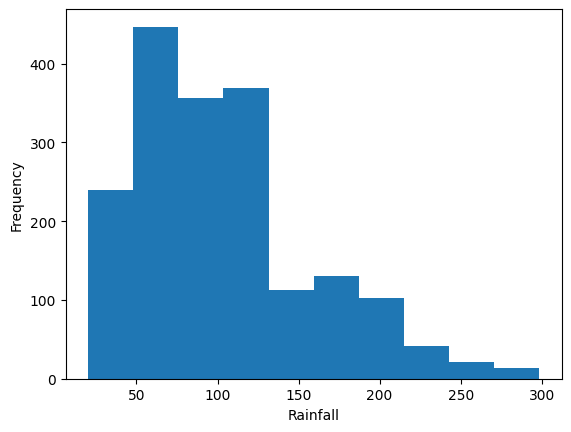

In [20]:
#Data visualization
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['RAINFALL'])
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

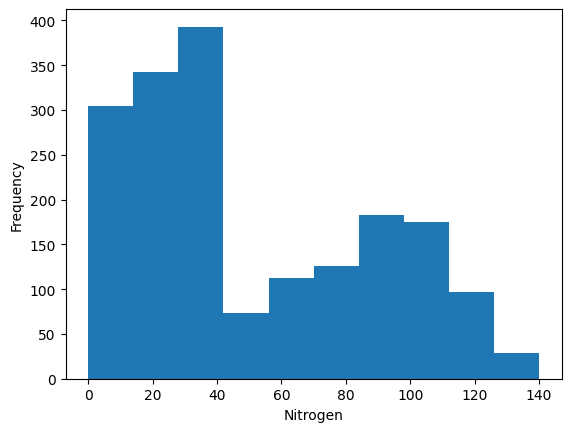

In [21]:
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['N_SOIL'])
plt.xlabel('Nitrogen')
plt.ylabel('Frequency')
plt.show()

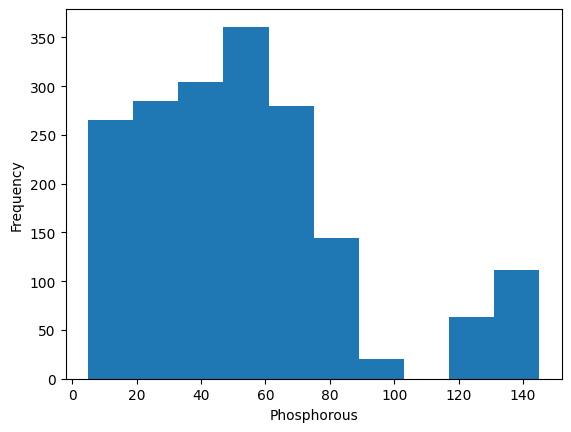

In [22]:
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['P_SOIL'])
plt.xlabel('Phosphorous')
plt.ylabel('Frequency')
plt.show()

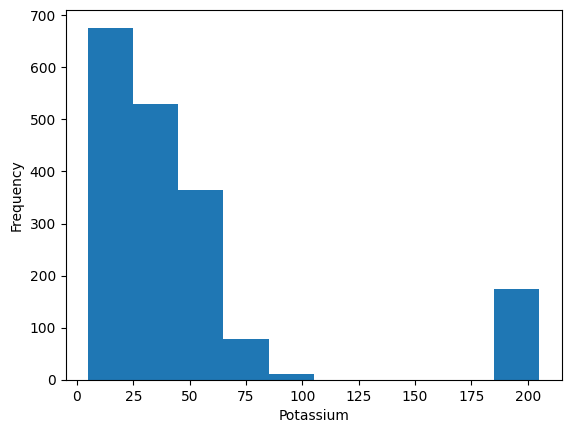

In [23]:
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['K_SOIL'])
plt.xlabel('Potassium')
plt.ylabel('Frequency')
plt.show()

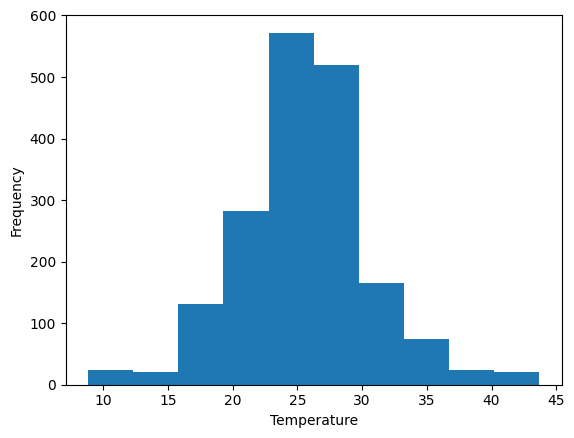

In [24]:
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['TEMPERATURE'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

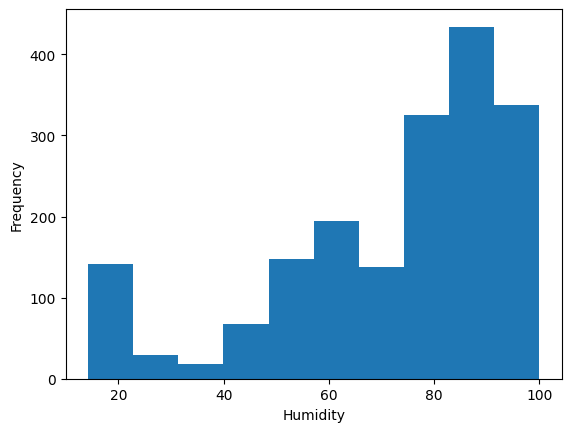

In [25]:
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['HUMIDITY'])
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

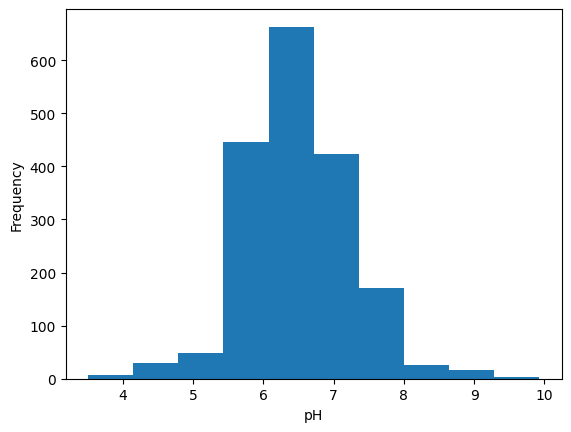

In [26]:
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['ph'])
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

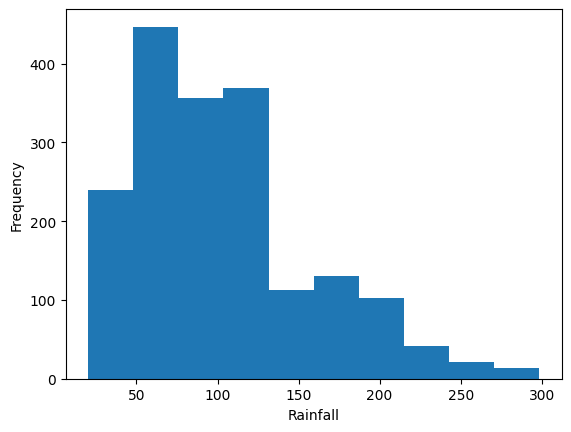

In [27]:
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['RAINFALL'])
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

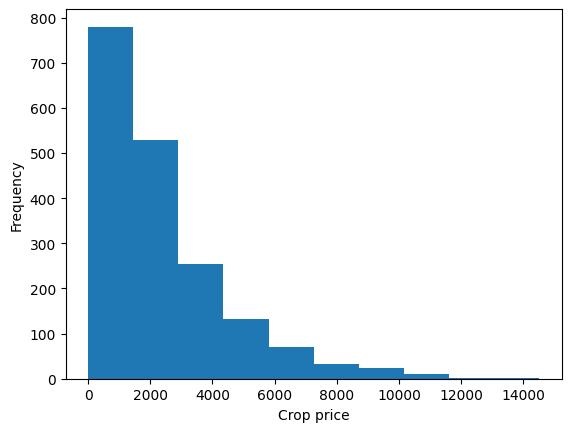

In [28]:
# Plot a histogram of the rainfall column
plt.hist(df_filteredCount['CROP_PRICE'])
plt.xlabel('Crop price')
plt.ylabel('Frequency')
plt.show()

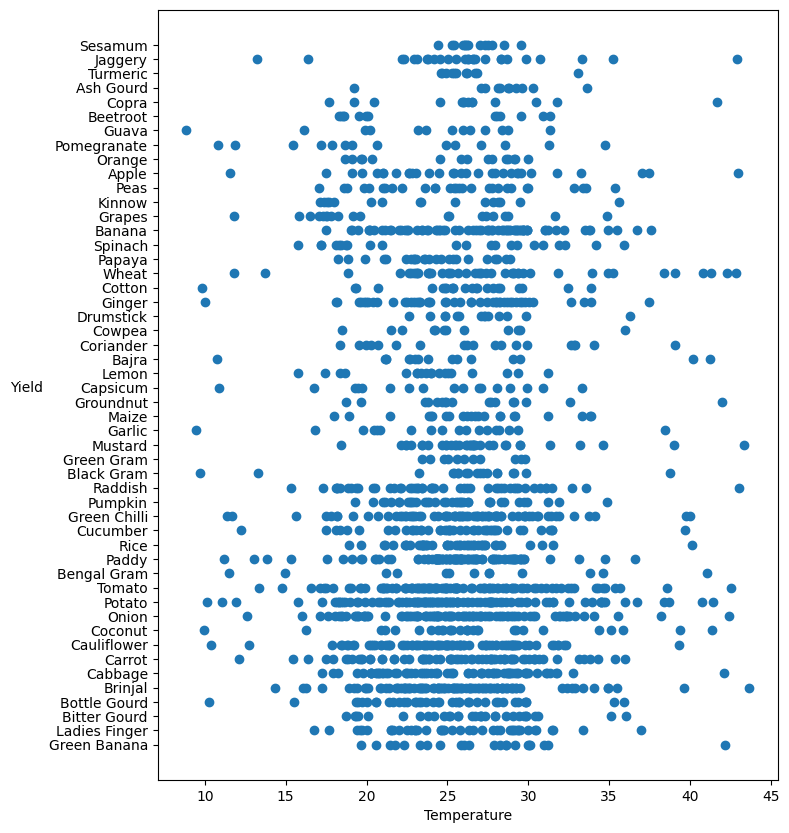

In [29]:
# Plot a scatter plot of the temperature and yield columns
plt.figure(figsize=(8,10))
plt.scatter(df_filteredCount['TEMPERATURE'], df_filteredCount['CROP'])
plt.xlabel('Temperature')
plt.ylabel('Yield', rotation=0, ha='right')
plt.savefig('scatter_plot.png')
plt.show()


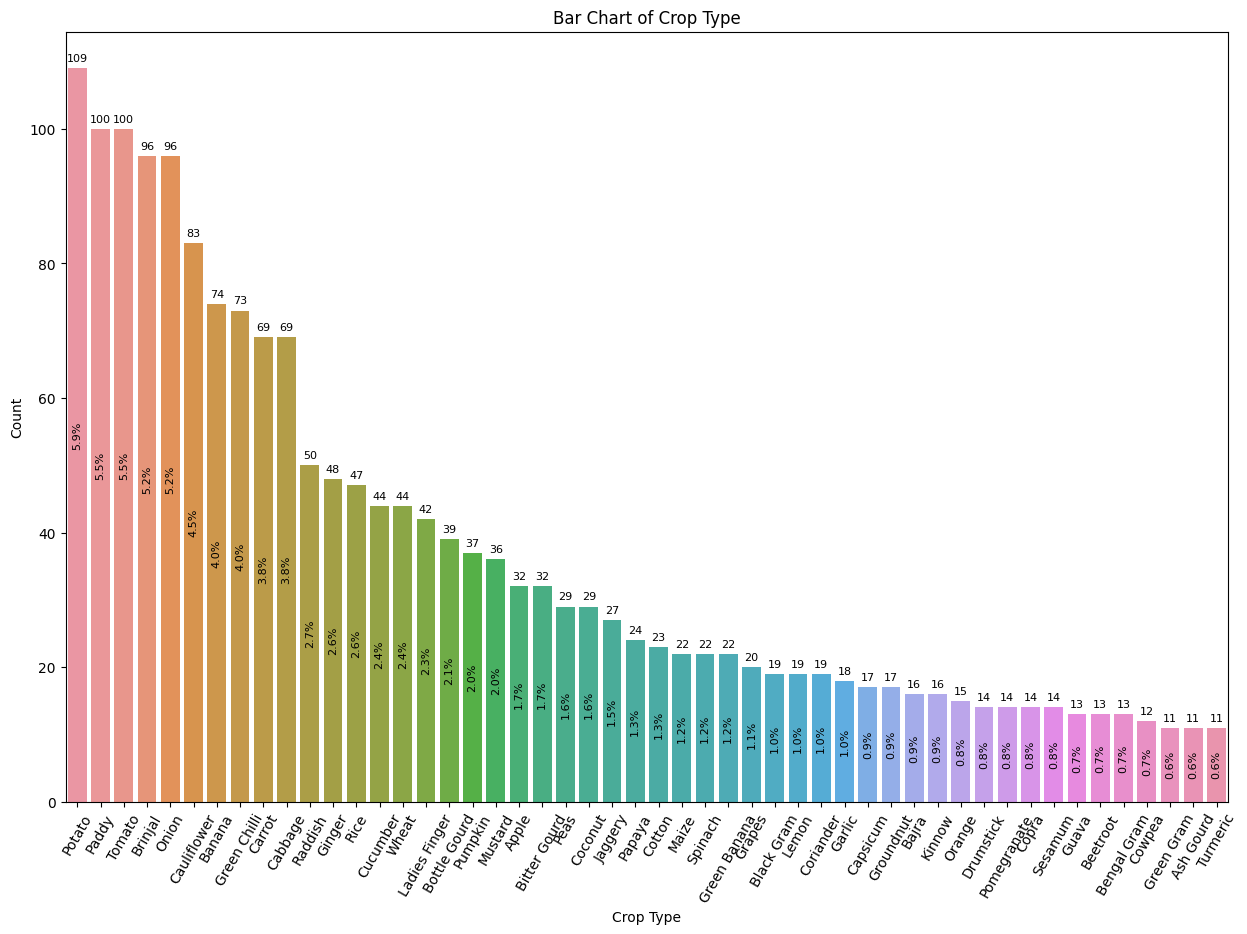

In [30]:
# Create a frequency table of crop types
Crop_freq = df_filteredCount['CROP'].value_counts()
Crop_filtered_freq = Crop_freq[Crop_freq > 0]

# Calculate unique count and percentage for each crop type
unique_count = Crop_filtered_freq.values
percentages = unique_count / sum(unique_count) * 100

# Create a bar chart of the frequency table
sns.set_palette("Set3")  # set color palette
plt.figure(figsize=(15, 10))  # set figure size
ax = sns.barplot(x=Crop_filtered_freq.index, y=unique_count)
plt.title('Bar Chart of Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Count')

# Display the unique count and percentage for each crop type
for i, v in enumerate(unique_count):
    ax.text(i, v + 1, f'{v}', ha='center', fontsize=8)
    ax.text(i, v/2, f'{percentages[i]:.1f}%', va='center', ha='center', fontsize=8, rotation=90)

# Rotate the labels to vertical
plt.xticks(rotation=60)

plt.show()


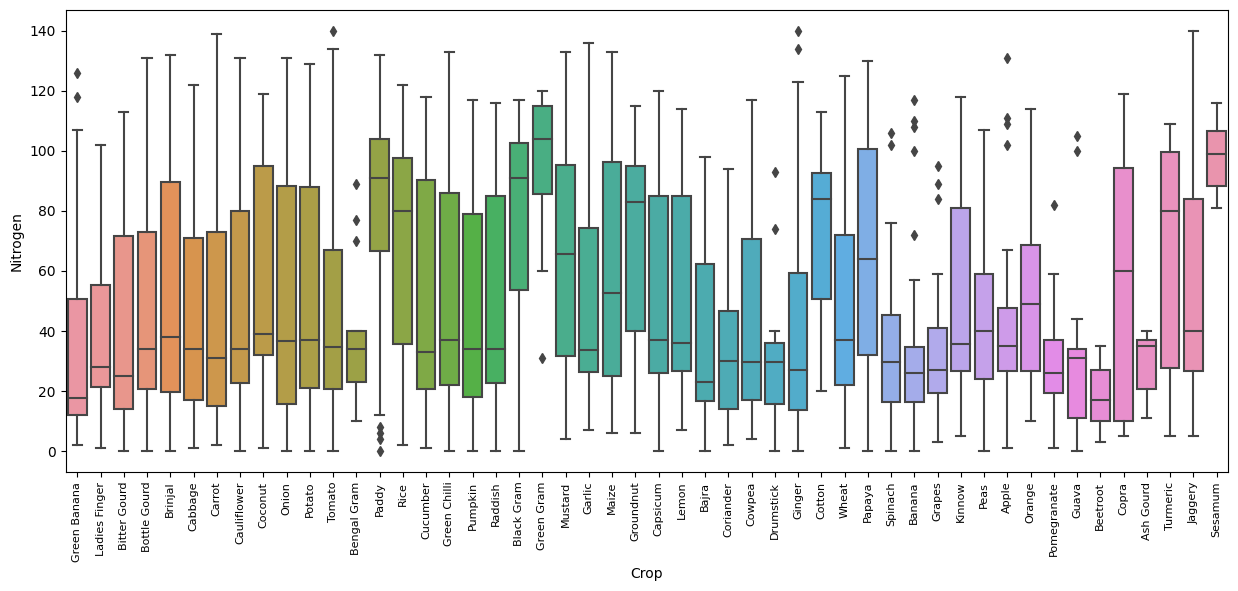

In [31]:
# Plot a box plot of the yield column by crop
plt.figure(figsize=(15,6))
sns.boxplot(x='CROP', y='N_SOIL', data=df_filteredCount)
plt.xlabel('Crop')
plt.ylabel('Nitrogen')

# Rotate x-axis labels by 90 degrees and set font size to 8
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.show()

In [32]:
#Check each crop type of mean, standard deviation and standard error of the mean based on different features

# group the data by crop
grouped = df_filteredCount.groupby('CROP')

# calculate the mean, standard deviation, and number of observations for each crop
means = grouped['N_SOIL'].mean()
stds = grouped['N_SOIL'].std(ddof=1)  # ddof=1 for sample standard deviation
counts = grouped['N_SOIL'].count()

# calculate the standard error of the mean for each crop
sems = stds / np.sqrt(counts)

# print the results
for crop in df_filteredCount['CROP'].unique():
    print(f"{crop}: mean={means[crop]:.2f}, std={stds[crop]:.2f}, sem={sems[crop]:.2f}")


Green Banana: mean=36.64, std=39.06, sem=8.33
Ladies Finger: mean=38.67, std=30.88, sem=4.76
Bitter Gourd: mean=43.91, std=37.46, sem=6.62
Bottle Gourd: mean=47.28, std=37.60, sem=6.02
Brinjal: mean=51.76, std=38.82, sem=3.96
Cabbage: mean=44.30, std=34.15, sem=4.11
Carrot: mean=44.75, std=37.90, sem=4.56
Cauliflower: mean=49.54, std=35.50, sem=3.90
Coconut: mean=58.55, std=39.03, sem=7.25
Onion: mean=50.04, std=40.21, sem=4.10
Potato: mean=51.63, std=38.60, sem=3.70
Tomato: mean=46.12, std=35.16, sem=3.52
Bengal Gram: mean=39.23, std=24.72, sem=6.86
Paddy: mean=81.44, std=32.18, sem=3.22
Rice: mean=68.87, std=36.34, sem=5.30
Cucumber: mean=50.30, std=39.44, sem=5.95
Green Chilli: mean=51.21, std=36.36, sem=4.26
Pumpkin: mean=46.70, std=36.49, sem=6.00
Raddish: mean=47.40, std=36.77, sem=5.20
Black Gram: mean=74.16, std=39.46, sem=9.05
Green Gram: mean=94.36, std=28.22, sem=8.51
Mustard: mean=65.61, std=35.83, sem=5.97
Garlic: mean=49.22, std=34.59, sem=8.15
Maize: mean=60.41, std=41.6

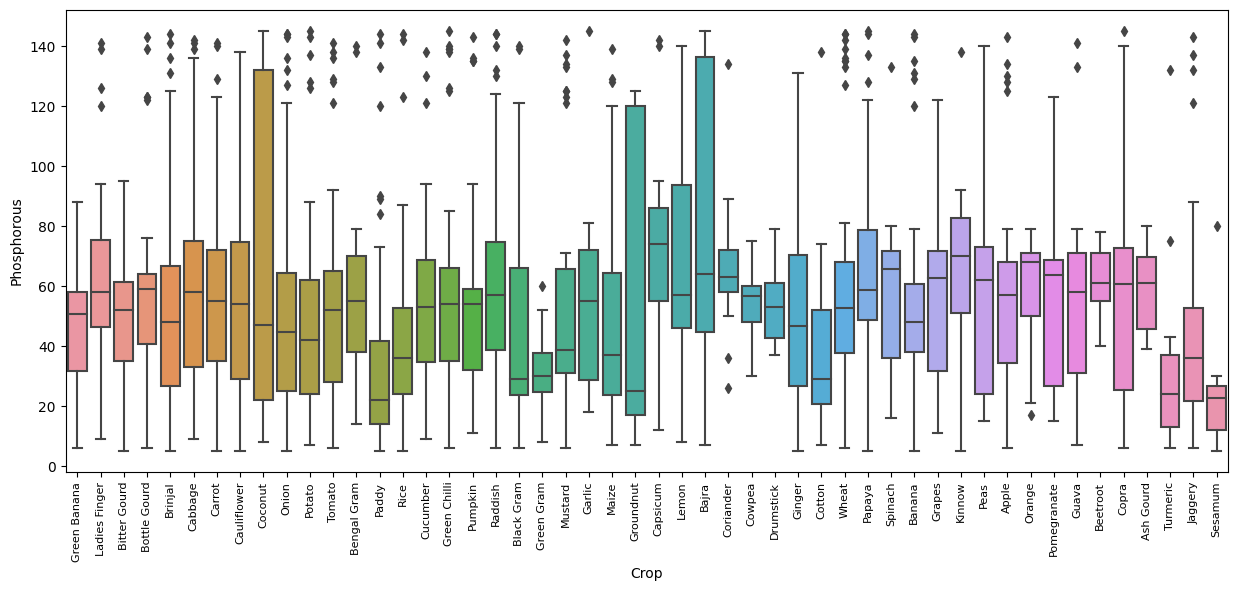

In [33]:
# Plot a box plot of the yield column by crop
plt.figure(figsize=(15,6))
sns.boxplot(x='CROP', y='P_SOIL', data=df_filteredCount)
plt.xlabel('Crop')
plt.ylabel('Phosphorous')

# Rotate x-axis labels by 90 degrees and set font size to 8
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.show()

In [34]:
# group the data by crop
grouped = df_filteredCount.groupby('CROP')

# calculate the mean, standard deviation, and number of observations for each crop
means = grouped['P_SOIL'].mean()
stds = grouped['P_SOIL'].std(ddof=1)  # ddof=1 for sample standard deviation
counts = grouped['P_SOIL'].count()

# calculate the standard error of the mean for each crop
sems = stds / np.sqrt(counts)

# print the results
for crop in df_filteredCount['CROP'].unique():
    print(f"{crop}: mean={means[crop]:.2f}, std={stds[crop]:.2f}, sem={sems[crop]:.2f}")


Green Banana: mean=47.32, std=22.07, sem=4.71
Ladies Finger: mean=62.98, std=29.18, sem=4.50
Bitter Gourd: mean=48.16, std=21.41, sem=3.78
Bottle Gourd: mean=59.49, std=32.49, sem=5.20
Brinjal: mean=49.93, std=31.43, sem=3.21
Cabbage: mean=55.70, std=32.12, sem=3.87
Carrot: mean=56.67, std=30.14, sem=3.63
Cauliflower: mean=55.19, std=32.26, sem=3.54
Coconut: mean=71.69, std=53.94, sem=10.02
Onion: mean=48.61, std=32.11, sem=3.28
Potato: mean=46.68, std=28.21, sem=2.70
Tomato: mean=50.69, std=30.22, sem=3.02
Bengal Gram: mean=62.54, std=39.11, sem=10.85
Paddy: mean=32.07, std=28.73, sem=2.87
Rice: mean=42.72, std=30.22, sem=4.41
Cucumber: mean=55.43, std=28.66, sem=4.32
Green Chilli: mean=54.59, std=32.86, sem=3.85
Pumpkin: mean=54.92, std=34.88, sem=5.73
Raddish: mean=59.76, std=34.94, sem=4.94
Black Gram: mean=50.47, std=42.38, sem=9.72
Green Gram: mean=32.09, std=14.35, sem=4.33
Mustard: mean=56.39, std=43.49, sem=7.25
Garlic: mean=54.56, std=31.22, sem=7.36
Maize: mean=51.50, std=42

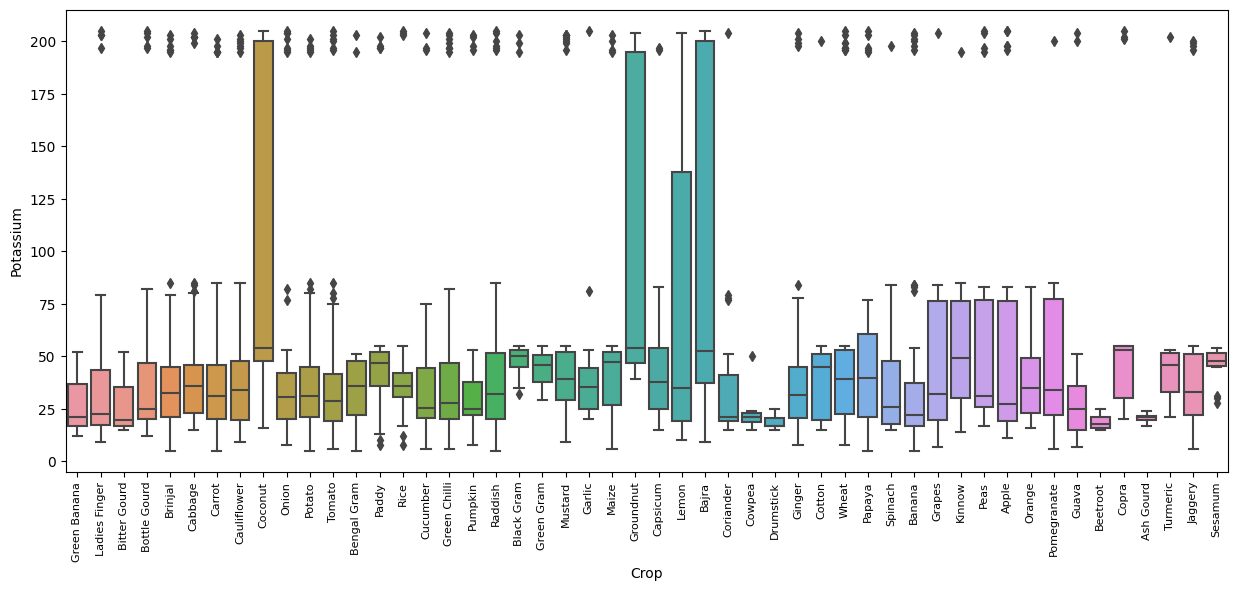

In [35]:
# Plot a box plot of the yield column by crop
plt.figure(figsize=(15,6))
sns.boxplot(x='CROP', y='K_SOIL', data=df_filteredCount)
plt.xlabel('Crop')
plt.ylabel('Potassium')

# Rotate x-axis labels by 90 degrees and set font size to 8
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.show()

In [36]:
# group the data by crop
grouped = df_filteredCount.groupby('CROP')

# calculate the mean, standard deviation, and number of observations for each crop
means = grouped['K_SOIL'].mean()
stds = grouped['K_SOIL'].std(ddof=1)  # ddof=1 for sample standard deviation
counts = grouped['K_SOIL'].count()

# calculate the standard error of the mean for each crop
sems = stds / np.sqrt(counts)

# print the results
for crop in df_filteredCount['CROP'].unique():
    print(f"{crop}: mean={means[crop]:.2f}, std={stds[crop]:.2f}, sem={sems[crop]:.2f}")

Green Banana: mean=26.45, std=12.00, sem=2.56
Ladies Finger: mean=44.48, std=54.01, sem=8.33
Bitter Gourd: mean=25.41, std=11.30, sem=2.00
Bottle Gourd: mean=53.56, std=59.93, sem=9.60
Brinjal: mean=42.89, std=42.84, sem=4.37
Cabbage: mean=46.96, std=46.64, sem=5.62
Carrot: mean=45.09, std=46.83, sem=5.64
Cauliflower: mean=47.96, std=49.25, sem=5.41
Coconut: mean=108.90, std=79.57, sem=14.78
Onion: mean=42.83, std=46.46, sem=4.74
Potato: mean=40.87, std=38.54, sem=3.69
Tomato: mean=40.97, std=43.57, sem=4.36
Bengal Gram: mean=56.92, std=64.57, sem=17.91
Paddy: mean=48.34, std=33.14, sem=3.31
Rice: mean=45.68, std=42.84, sem=6.25
Cucumber: mean=41.73, std=45.53, sem=6.86
Green Chilli: mean=46.74, std=52.47, sem=6.14
Pumpkin: mean=46.14, std=55.34, sem=9.10
Raddish: mean=54.18, std=57.92, sem=8.19
Black Gram: mean=70.68, std=57.41, sem=13.17
Green Gram: mean=44.18, std=8.15, sem=2.46
Mustard: mean=71.42, std=70.90, sem=11.82
Garlic: mean=45.78, std=42.55, sem=10.03
Maize: mean=66.91, std

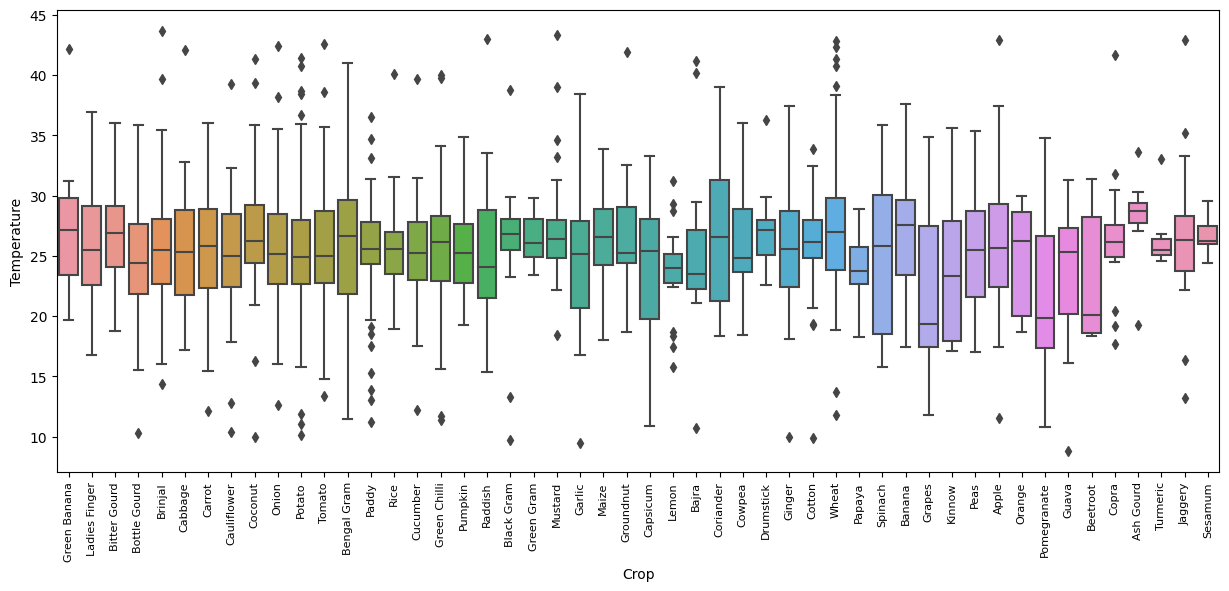

In [37]:
# Plot a box plot of the yield column by crop
plt.figure(figsize=(15,6))
sns.boxplot(x='CROP', y='TEMPERATURE', data=df_filteredCount)
plt.xlabel('Crop')
plt.ylabel('Temperature')

# Rotate x-axis labels by 90 degrees and set font size to 8
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.show()

In [38]:
# group the data by crop
grouped = df_filteredCount.groupby('CROP')

# calculate the mean, standard deviation, and number of observations for each crop
means = grouped['TEMPERATURE'].mean()
stds = grouped['TEMPERATURE'].std(ddof=1)  # ddof=1 for sample standard deviation
counts = grouped['TEMPERATURE'].count()

# calculate the standard error of the mean for each crop
sems = stds / np.sqrt(counts)

# print the results
for crop in df_filteredCount['CROP'].unique():
    print(f"{crop}: mean={means[crop]:.2f}, std={stds[crop]:.2f}, sem={sems[crop]:.2f}")

Green Banana: mean=26.94, std=4.94, sem=1.05
Ladies Finger: mean=25.73, std=4.48, sem=0.69
Bitter Gourd: mean=26.35, std=4.24, sem=0.75
Bottle Gourd: mean=24.56, std=4.85, sem=0.78
Brinjal: mean=25.75, std=4.76, sem=0.49
Cabbage: mean=25.51, std=4.50, sem=0.54
Carrot: mean=25.61, std=5.01, sem=0.60
Cauliflower: mean=25.06, std=4.54, sem=0.50
Coconut: mean=26.77, std=6.40, sem=1.19
Onion: mean=25.55, std=5.02, sem=0.51
Potato: mean=25.53, std=5.73, sem=0.55
Tomato: mean=25.71, std=5.12, sem=0.51
Bengal Gram: mean=26.18, std=7.92, sem=2.20
Paddy: mean=25.41, std=3.95, sem=0.40
Rice: mean=25.43, std=3.45, sem=0.50
Cucumber: mean=25.34, std=4.63, sem=0.70
Green Chilli: mean=25.90, std=5.17, sem=0.60
Pumpkin: mean=25.40, std=3.49, sem=0.57
Raddish: mean=24.97, std=5.28, sem=0.75
Black Gram: mean=25.90, std=5.99, sem=1.37
Green Gram: mean=26.45, std=2.23, sem=0.67
Mustard: mean=27.04, std=4.67, sem=0.78
Garlic: mean=24.35, std=6.12, sem=1.44
Maize: mean=26.67, std=4.24, sem=0.90
Groundnut: m

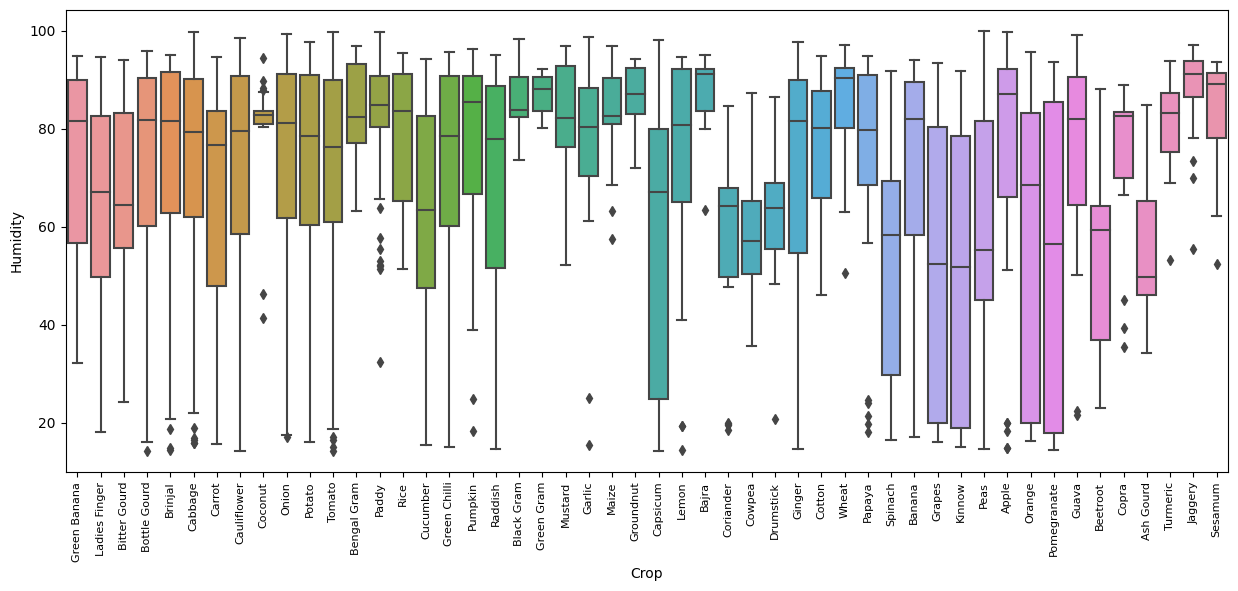

In [39]:
# Plot a box plot of the yield column by crop
plt.figure(figsize=(15,6))
sns.boxplot(x='CROP', y='HUMIDITY', data=df_filteredCount)
plt.xlabel('Crop')
plt.ylabel('Humidity')

# Rotate x-axis labels by 90 degrees and set font size to 8
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.show()

In [40]:
# group the data by crop
grouped = df_filteredCount.groupby('CROP')

# calculate the mean, standard deviation, and number of observations for each crop
means = grouped['HUMIDITY'].mean()
stds = grouped['HUMIDITY'].std(ddof=1)  # ddof=1 for sample standard deviation
counts = grouped['HUMIDITY'].count()

# calculate the standard error of the mean for each crop
sems = stds / np.sqrt(counts)

# print the results
for crop in df_filteredCount['CROP'].unique():
    print(f"{crop}: mean={means[crop]:.2f}, std={stds[crop]:.2f}, sem={sems[crop]:.2f}")

Green Banana: mean=72.37, std=20.95, sem=4.47
Ladies Finger: mean=64.98, std=23.35, sem=3.60
Bitter Gourd: mean=65.88, std=18.35, sem=3.24
Bottle Gourd: mean=69.53, std=24.72, sem=3.96
Brinjal: mean=74.57, std=20.37, sem=2.08
Cabbage: mean=70.67, std=23.27, sem=2.80
Carrot: mean=65.51, std=25.10, sem=3.02
Cauliflower: mean=70.99, std=23.35, sem=2.56
Coconut: mean=80.95, std=10.83, sem=2.01
Onion: mean=74.75, std=19.44, sem=1.98
Potato: mean=71.91, std=22.29, sem=2.14
Tomato: mean=70.60, std=22.25, sem=2.23
Bengal Gram: mean=83.41, std=11.59, sem=3.21
Paddy: mean=82.92, std=11.47, sem=1.15
Rice: mean=78.50, std=14.29, sem=2.08
Cucumber: mean=61.61, std=22.90, sem=3.45
Green Chilli: mean=71.79, std=22.04, sem=2.58
Pumpkin: mean=77.30, std=20.50, sem=3.37
Raddish: mean=67.04, std=26.59, sem=3.76
Black Gram: mean=85.66, std=6.51, sem=1.49
Green Gram: mean=86.93, std=4.21, sem=1.27
Mustard: mean=81.30, std=13.74, sem=2.29
Garlic: mean=74.93, std=22.43, sem=5.29
Maize: mean=83.09, std=10.20,

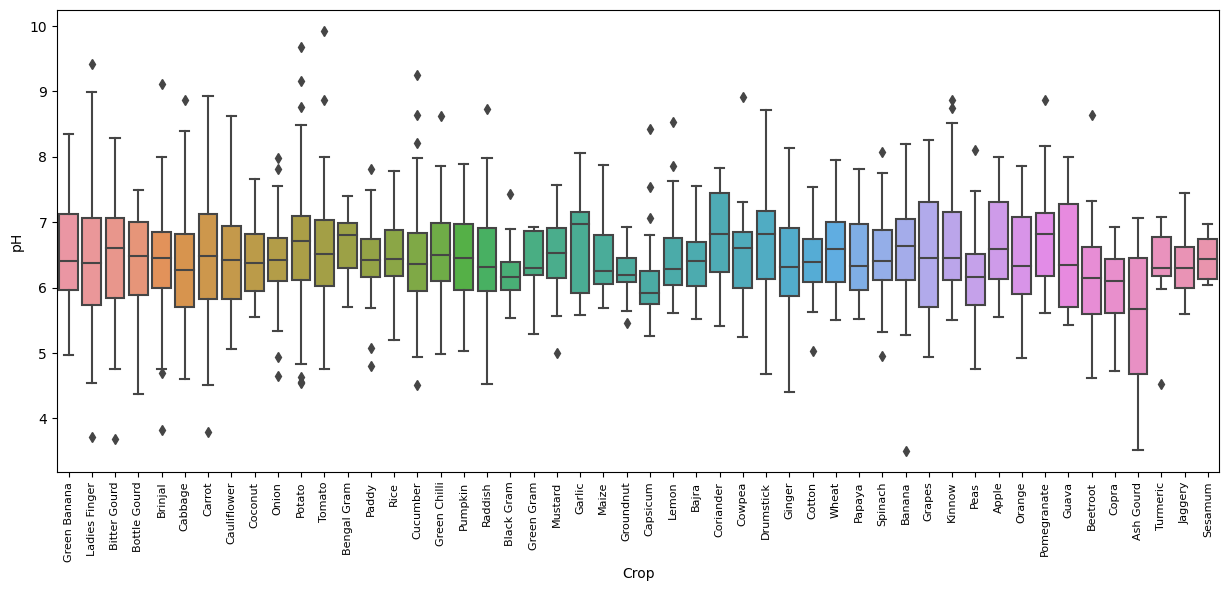

In [41]:
# Plot a box plot of the yield column by crop
plt.figure(figsize=(15,6))
sns.boxplot(x='CROP', y='ph', data=df_filteredCount)
plt.xlabel('Crop')
plt.ylabel('pH')

# Rotate x-axis labels by 90 degrees and set font size to 8
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.show()

In [42]:
# group the data by crop
grouped = df_filteredCount.groupby('CROP')

# calculate the mean, standard deviation, and number of observations for each crop
means = grouped['ph'].mean()
stds = grouped['ph'].std(ddof=1)  # ddof=1 for sample standard deviation
counts = grouped['ph'].count()

# calculate the standard error of the mean for each crop
sems = stds / np.sqrt(counts)

# print the results
for crop in df_filteredCount['CROP'].unique():
    print(f"{crop}: mean={means[crop]:.2f}, std={stds[crop]:.2f}, sem={sems[crop]:.2f}")

Green Banana: mean=6.54, std=0.86, sem=0.18
Ladies Finger: mean=6.40, std=1.13, sem=0.17
Bitter Gourd: mean=6.46, std=1.00, sem=0.18
Bottle Gourd: mean=6.41, std=0.75, sem=0.12
Brinjal: mean=6.41, std=0.72, sem=0.07
Cabbage: mean=6.38, std=0.84, sem=0.10
Carrot: mean=6.54, std=0.95, sem=0.11
Cauliflower: mean=6.49, std=0.76, sem=0.08
Coconut: mean=6.39, std=0.53, sem=0.10
Onion: mean=6.43, std=0.60, sem=0.06
Potato: mean=6.66, std=0.87, sem=0.08
Tomato: mean=6.57, std=0.80, sem=0.08
Bengal Gram: mean=6.65, std=0.52, sem=0.14
Paddy: mean=6.42, std=0.45, sem=0.04
Rice: mean=6.52, std=0.56, sem=0.08
Cucumber: mean=6.53, std=0.91, sem=0.14
Green Chilli: mean=6.55, std=0.66, sem=0.08
Pumpkin: mean=6.45, std=0.66, sem=0.11
Raddish: mean=6.43, std=0.81, sem=0.11
Black Gram: mean=6.21, std=0.45, sem=0.10
Green Gram: mean=6.37, std=0.56, sem=0.17
Mustard: mean=6.50, std=0.58, sem=0.10
Garlic: mean=6.69, std=0.78, sem=0.18
Maize: mean=6.44, std=0.57, sem=0.12
Groundnut: mean=6.23, std=0.41, sem=

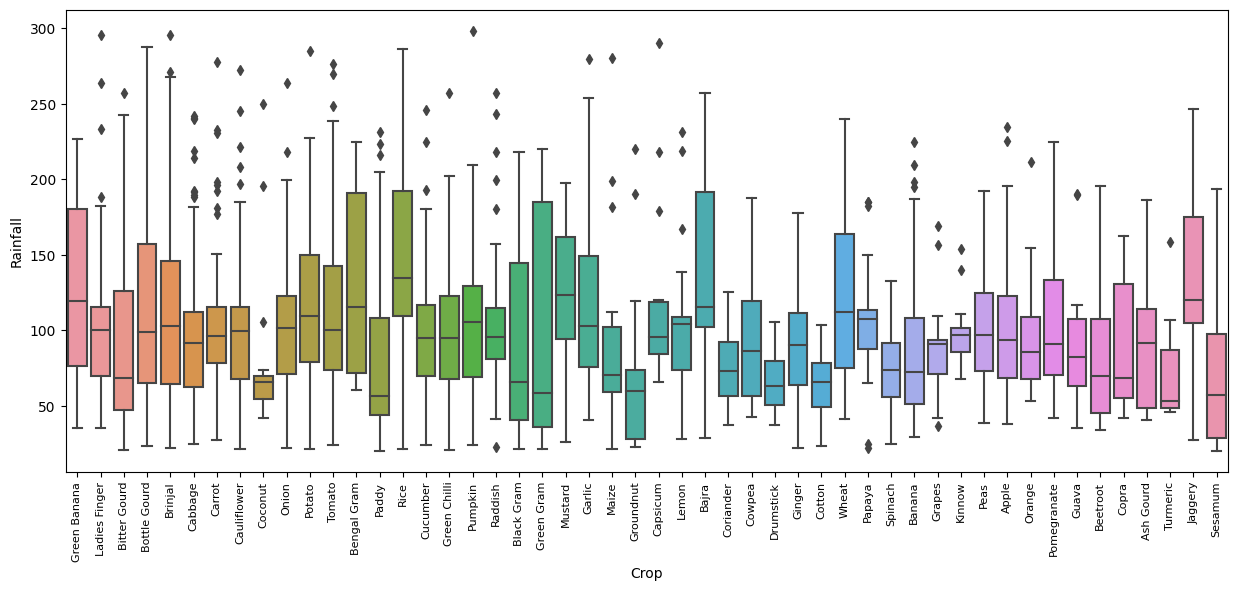

In [43]:
# Plot a box plot of the yield column by crop
plt.figure(figsize=(15,6))
sns.boxplot(x='CROP', y='RAINFALL', data=df_filteredCount)
plt.xlabel('Crop')
plt.ylabel('Rainfall')

# Rotate x-axis labels by 90 degrees and set font size to 8
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.show()

In [44]:
# group the data by crop
grouped = df_filteredCount.groupby('CROP')

# calculate the mean, standard deviation, and number of observations for each crop
means = grouped['RAINFALL'].mean()
stds = grouped['RAINFALL'].std(ddof=1)  # ddof=1 for sample standard deviation
counts = grouped['RAINFALL'].count()

# calculate the standard error of the mean for each crop
sems = stds / np.sqrt(counts)

# print the results
for crop in df_filteredCount['CROP'].unique():
    print(f"{crop}: mean={means[crop]:.2f}, std={stds[crop]:.2f}, sem={sems[crop]:.2f}")

Green Banana: mean=126.72, std=62.40, sem=13.30
Ladies Finger: mean=105.41, std=57.70, sem=8.90
Bitter Gourd: mean=95.93, std=66.99, sem=11.84
Bottle Gourd: mean=115.07, std=69.31, sem=11.10
Brinjal: mean=111.22, std=62.23, sem=6.35
Cabbage: mean=100.42, std=57.01, sem=6.86
Carrot: mean=106.66, std=46.13, sem=5.55
Cauliflower: mean=100.66, std=48.21, sem=5.29
Coconut: mean=72.68, std=44.13, sem=8.20
Onion: mean=105.79, std=47.23, sem=4.82
Potato: mean=116.13, std=51.70, sem=4.95
Tomato: mean=113.38, std=54.96, sem=5.50
Bengal Gram: mean=128.60, std=63.34, sem=17.57
Paddy: mean=80.11, std=54.79, sem=5.48
Rice: mean=144.63, std=55.15, sem=8.04
Cucumber: mean=100.07, std=50.23, sem=7.57
Green Chilli: mean=103.06, std=49.79, sem=5.83
Pumpkin: mean=108.98, std=56.18, sem=9.24
Raddish: mean=105.50, std=47.10, sem=6.66
Black Gram: mean=91.11, std=69.39, sem=15.92
Green Gram: mean=106.96, std=80.93, sem=24.40
Mustard: mean=125.89, std=47.52, sem=7.92
Garlic: mean=122.30, std=66.34, sem=15.64
M

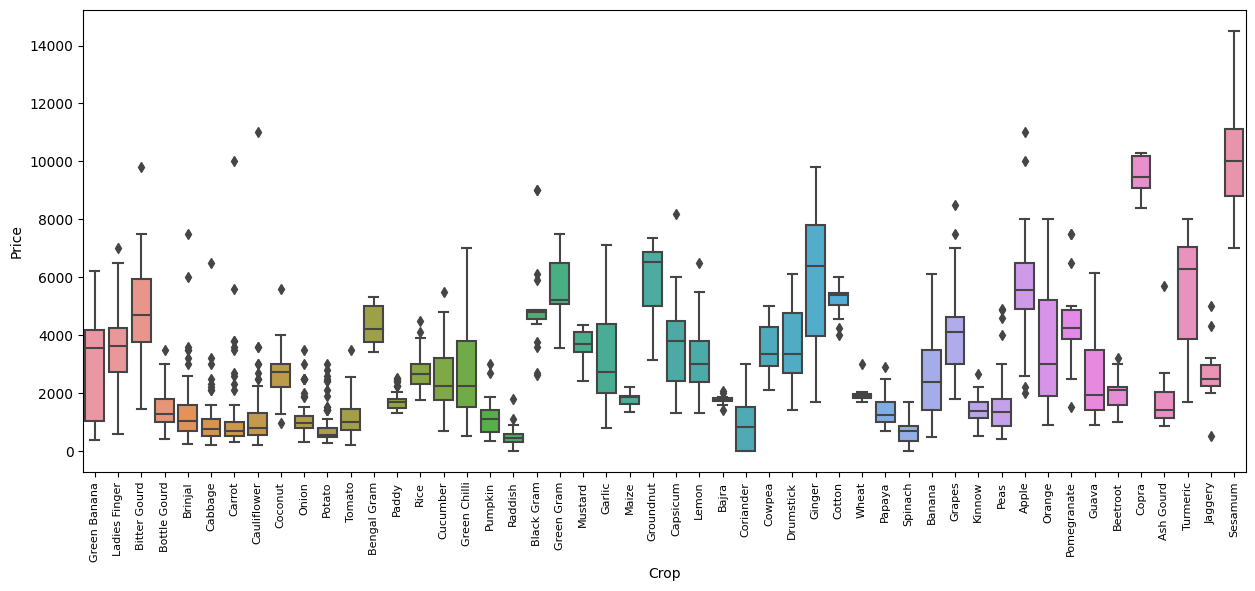

In [45]:
# Plot a box plot of the yield column by crop
plt.figure(figsize=(15,6))
sns.boxplot(x='CROP', y='CROP_PRICE', data=df_filteredCount)
plt.xlabel('Crop')
plt.ylabel('Price')

# Rotate x-axis labels by 90 degrees and set font size to 8
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.show()

In [46]:
# group the data by crop
grouped = df_filteredCount.groupby('CROP')

# calculate the mean, standard deviation, and number of observations for each crop
means = grouped['CROP_PRICE'].mean()
stds = grouped['CROP_PRICE'].std(ddof=1)  # ddof=1 for sample standard deviation
counts = grouped['CROP_PRICE'].count()

# calculate the standard error of the mean for each crop
sems = stds / np.sqrt(counts)

# print the results
for crop in df_filteredCount['CROP'].unique():
    print(f"{crop}: mean={means[crop]:.2f}, std={stds[crop]:.2f}, sem={sems[crop]:.2f}")

Green Banana: mean=2962.27, std=1821.88, sem=388.43
Ladies Finger: mean=3646.31, std=1593.72, sem=245.92
Bitter Gourd: mean=4878.12, std=1711.59, sem=302.57
Bottle Gourd: mean=1470.00, std=731.26, sem=117.09
Brinjal: mean=1368.48, std=1095.04, sem=111.76
Cabbage: mean=1016.45, std=921.98, sem=110.99
Carrot: mean=1169.13, std=1470.82, sem=177.07
Cauliflower: mean=1185.42, std=1328.32, sem=145.80
Coconut: mean=2627.24, std=904.31, sem=167.93
Onion: mean=1081.78, std=573.58, sem=58.54
Potato: mean=771.48, std=551.72, sem=52.84
Tomato: mean=1152.91, std=580.25, sem=58.03
Bengal Gram: mean=4323.54, std=666.44, sem=184.84
Paddy: mean=1686.22, std=269.06, sem=26.91
Rice: mean=2772.87, std=605.94, sem=88.39
Cucumber: mean=2455.11, std=1071.29, sem=161.50
Green Chilli: mean=2766.03, std=1620.42, sem=189.66
Pumpkin: mean=1094.05, std=609.73, sem=100.24
Raddish: mean=496.66, std=306.93, sem=43.41
Black Gram: mean=5001.21, std=1655.07, sem=379.70
Green Gram: mean=5605.55, std=1186.47, sem=357.74
M

c:\Users\Lim Ee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


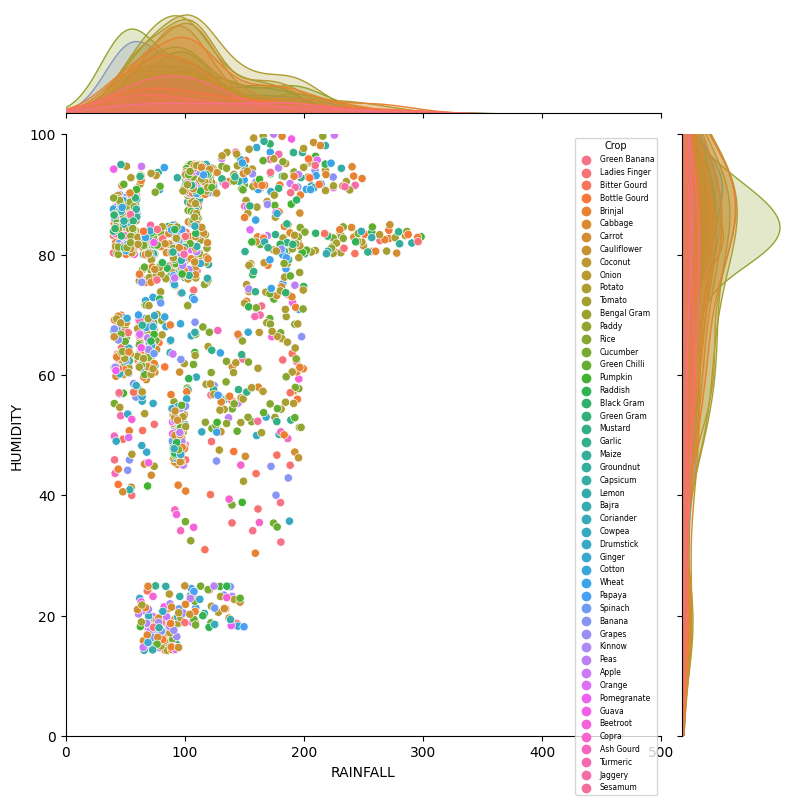

In [47]:
#Rainfall, Humidity and Temperature are the most correlated with each other
#Therefore, jointplot has been plotted for the further assess the data
sns.jointplot(x="RAINFALL", y="HUMIDITY", data=df_filteredCount[(df_filteredCount['TEMPERATURE']<40) & (df_filteredCount['RAINFALL']>40)], height=8, kind='scatter', cmap='Blues', hue='CROP')
plt.xlim(0, 500)
plt.ylim(0, 100)
plt.legend(fontsize=5.5, title='Crop', title_fontsize=7)
plt.show()

In [48]:
#crop appear with higher humidity >=80 and high rainfall >=100
df_filteredCount.loc[(df_filteredCount['HUMIDITY'] >= 80) & (df_filteredCount['RAINFALL'] >= 100), 'CROP'].value_counts()

Brinjal          39
Potato           38
Tomato           37
Onion            35
Cauliflower      30
Rice             23
Green Chilli     22
Cabbage          22
Wheat            21
Paddy            21
Carrot           20
Jaggery          20
Banana           18
Pumpkin          17
Mustard          17
Bottle Gourd     15
Raddish          15
Apple            14
Ginger           14
Bajra            12
Ladies Finger    11
Lemon             8
Green Banana      8
Garlic            8
Cucumber          7
Peas              7
Maize             6
Bitter Gourd      6
Bengal Gram       6
Orange            5
Green Gram        5
Papaya            5
Pomegranate       4
Black Gram        4
Guava             4
Grapes            3
Capsicum          3
Turmeric          2
Groundnut         2
Coconut           2
Copra             1
Coriander         1
Kinnow            1
Name: CROP, dtype: int64

In [49]:
#crop appear with lower humidity < 60 and high rainfall < 50
df_filteredCount.loc[(df_filteredCount['HUMIDITY'] < 60) & (df_filteredCount['RAINFALL'] < 50), 'CROP'].value_counts()


Cabbage         4
Cucumber        3
Cauliflower     3
Green Banana    3
Bottle Gourd    2
Ash Gourd       2
Ginger          2
Bitter Gourd    2
Banana          2
Pumpkin         2
Turmeric        1
Brinjal         1
Onion           1
Green Chilli    1
Potato          1
Carrot          1
Cowpea          1
Name: CROP, dtype: int64

C:\Users\Lim Ee\AppData\Local\Temp\ipykernel_27700\3388551209.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_filteredCount.corr(), annot=True,cmap='coolwarm')


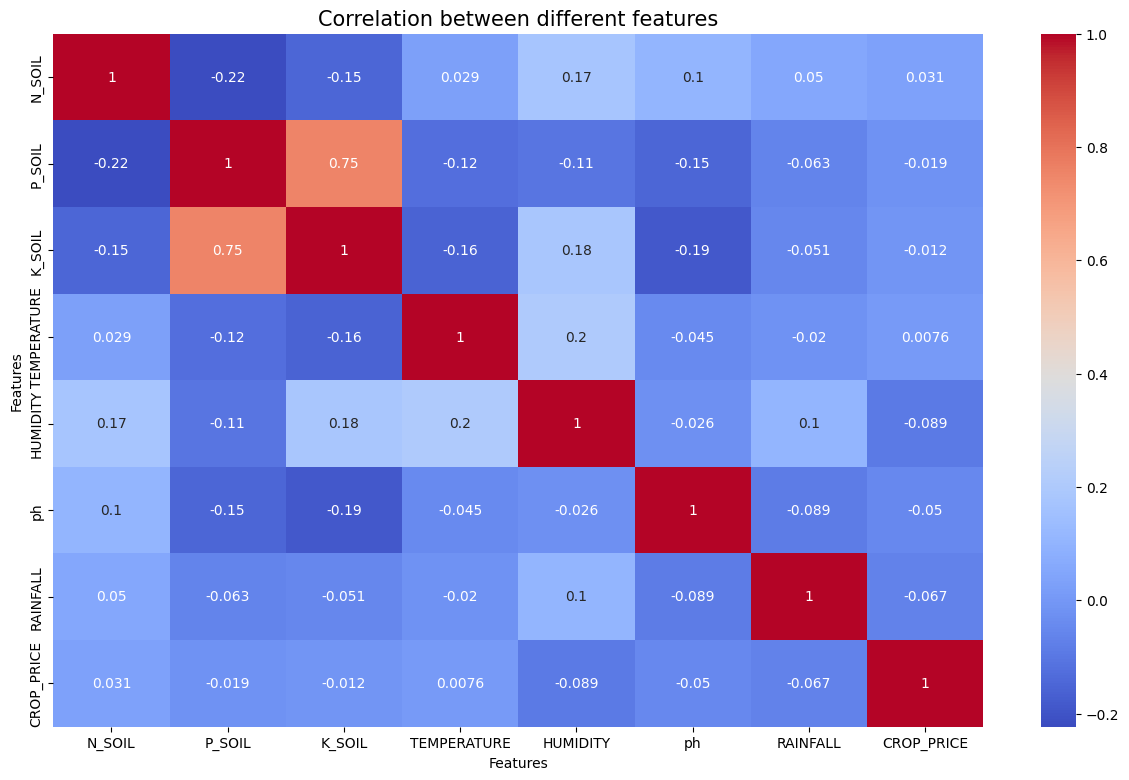

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df_filteredCount.corr(), annot=True,cmap='coolwarm')
ax.set(xlabel='Features')
ax.set(ylabel='Features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [52]:
crop_summary = pd.pivot_table(df_filteredCount, index=['CROP'], aggfunc='mean')
crop_summary


C:\Users\Lim Ee\AppData\Local\Temp\ipykernel_27700\2197542101.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  crop_summary = pd.pivot_table(df_filteredCount, index=['CROP'], aggfunc='mean')


CROP_PRICE   HUMIDITY      K_SOIL     N_SOIL     P_SOIL  \
CROP                                                                      
Apple          5722.968750  73.948772   59.750000  42.468750  57.187500   
Ash Gourd      1931.818182  55.542447   20.727273  28.636364  57.727273   
Bajra          1771.062500  87.841082  107.125000  38.375000  82.125000   
Banana         2543.581081  72.046311   40.918919  28.418919  53.054054   
Beetroot       2053.846154  53.835831   18.692308  18.615385  61.000000   
Bengal Gram    4323.538462  83.413801   56.923077  39.230769  62.538462   
Bitter Gourd   4878.125000  65.879195   25.406250  43.906250  48.156250   
Black Gram     5001.210526  85.664458   70.684211  74.157895  50.473684   
Bottle Gourd   1470.000000  69.530984   53.564103  47.282051  59.487179   
Brinjal        1368.479167  74.574109   42.885417  51.760417  49.927083   
Cabbage        1016.449275  70.674072   46.956522  44.304348  55.695652   
Capsicum       3715.882353  58.066468   57.529412  50.352941  74.176471   
Carrot         1169.130435  65.507352   45.086957  44.753623  56.666667   
Cauliflower    1185.421687  70.989646   47.963855  49.542169  55.192771   
Coconut        2627.241379  80.947196  108.896552  58.551724  71.689655   
Copra          9547.500000  73.101748   76.000000  57.857143  62.142857   
Coriander       958.894737  55.838286   41.421053  33.894737  65.894737   
Cotton         5207.869565  75.400676   42.478261  73.391304  39.217391   
Cowpea         3469.083333  60.278642   22.666667  44.083333  54.333333   
Cucumber       2455.113636  61.605323   41.727273  50.295455  55.431818   
Drumstick      3669.642857  63.149504   18.357143  30.785714  53.928571   
Garlic         3165.555556  74.932451   45.777778  49.222222  54.555556   
Ginger         5984.375000  70.291967   47.062500  40.416667  51.083333   
Grapes         4397.000000  51.742383   49.900000  35.600000  56.050000   
Green Banana   2962.272727  72.367166   26.454545  36.636364  47.318182   
Green Chilli   2766.027397  71.787347   46.739726  51.205479  54.589041   
Green Gram     5605.545455  86.928313   44.181818  94.363636  32.090909   
Groundnut      5847.941176  86.831926   93.176471  70.588235  54.117647   
Guava          2451.923077  71.578732   51.230769  33.461538  58.615385   
Jaggery        2630.740741  88.047015   55.111111  55.481481  48.592593   
Kinnow         1440.625000  50.198528   58.687500  52.750000  65.562500   
Ladies Finger  3646.309524  64.979128   44.476190  38.666667  62.976190   
Lemon          3124.210526  71.711941   74.894737  51.526316  69.578947   
Maize          1767.636364  83.093676   66.909091  60.409091  51.500000   
Mustard        3700.388889  81.298798   71.416667  65.611111  56.388889   
Onion          1081.781250  74.747305   42.833333  50.041667  48.614583   
Orange         3820.000000  58.500258   40.266667  49.400000  58.466667   
Paddy          1686.220000  82.917042   48.340000  81.440000  32.070000   
Papaya         1387.708333  70.298516   67.250000  63.708333  68.708333   
Peas           1789.310345  57.918413   60.206897  43.793103  60.655172   
Pomegranate    4517.142857  51.453966   51.714286  30.071429  54.785714   
Potato          771.477064  71.907184   40.871560  51.633028  46.678899   
Pumpkin        1094.054054  77.298053   46.135135  46.702703  54.918919   
Raddish         496.660000  67.035470   54.180000  47.400000  59.760000   
Rice           2772.872340  78.498760   45.680851  68.872340  42.723404   
Sesamum        9885.357143  82.167088   45.285714  98.500000  23.071429   
Spinach         634.636364  53.836216   41.363636  36.409091  57.363636   
Tomato         1152.910000  70.598930   40.970000  46.120000  50.690000   
Turmeric       5430.454545  80.134729   54.727273  65.000000  35.636364   
Wheat          1909.159091  84.649527   66.772727  48.113636  62.909091   

                 RAINFALL  TEMPERATURE        ph  
CROP                                              
Apple        

In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import random

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']


In [54]:
crop_summary_N = crop_summary.sort_values(by='N_SOIL', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N_SOIL'][0:10].sort_values().index,
    'x' : crop_summary_N['N_SOIL'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N_SOIL'][-10:].index,
    'x' : crop_summary_N['N_SOIL'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=last['x']),
    row=1, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text='Top and least nitrogen required crops', height=500, width=1000)

fig.show()

In [55]:
crop_summary_P = crop_summary.sort_values(by='P_SOIL', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P_SOIL'][0:10].sort_values().index,
    'x' : crop_summary_P['P_SOIL'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P_SOIL'][-10:].index,
    'x' : crop_summary_P['P_SOIL'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most Phosphorous required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least Phosphorous required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=last['x']),
    row=1, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text='Top and least Phosphorous required crops', height=500, width=1000)

fig.show()

In [56]:
crop_summary_K = crop_summary.sort_values(by='K_SOIL', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K_SOIL'][0:10].sort_values().index,
    'x' : crop_summary_K['K_SOIL'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K_SOIL'][-10:].index,
    'x' : crop_summary_K['K_SOIL'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most Potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least Potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=last['x']),
    row=1, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text='Top and least Potassium required crops', height=500, width=1000)

fig.show()

In [57]:
crop_summary_T = crop_summary.sort_values(by='TEMPERATURE', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_T['TEMPERATURE'][0:10].sort_values().index,
    'x' : crop_summary_T['TEMPERATURE'][0:10].sort_values()
}

last = {
    'y' : crop_summary_T['TEMPERATURE'][-10:].index,
    'x' : crop_summary_T['TEMPERATURE'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most Temperature required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least Temperature required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=last['x']),
    row=1, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text='Top and least Temperature required crops', height=500, width=1000)

fig.show()

In [58]:
crop_summary_H = crop_summary.sort_values(by='HUMIDITY', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_H['HUMIDITY'][0:10].sort_values().index,
    'x' : crop_summary_H['HUMIDITY'][0:10].sort_values()
}

last = {
    'y' : crop_summary_H['HUMIDITY'][-10:].index,
    'x' : crop_summary_H['HUMIDITY'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most Humidity required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least Humidity required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=last['x']),
    row=1, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text='Top and least Humidity required crops', height=500, width=1000)

fig.show()

In [59]:
crop_summary_p = crop_summary.sort_values(by='ph', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_p['ph'][0:10].sort_values().index,
    'x' : crop_summary_p['ph'][0:10].sort_values()
}

last = {
    'y' : crop_summary_p['ph'][-10:].index,
    'x' : crop_summary_p['ph'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most pH required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least pH required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=last['x']),
    row=1, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text='Top and least pH required crops', height=500, width=1000)

fig.show()

In [60]:
crop_summary_r = crop_summary.sort_values(by='RAINFALL', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_r['RAINFALL'][0:10].sort_values().index,
    'x' : crop_summary_r['RAINFALL'][0:10].sort_values()
}

last = {
    'y' : crop_summary_r['RAINFALL'][-10:].index,
    'x' : crop_summary_r['RAINFALL'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most Rainfall required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least Rainfall required",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=last['x']),
    row=1, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text='Top and least Rainfall required crops', height=500, width=1000)

fig.show()

In [61]:
crop_summary_r = crop_summary.sort_values(by='CROP_PRICE', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_r['CROP_PRICE'][0:10].sort_values().index,
    'x' : crop_summary_r['CROP_PRICE'][0:10].sort_values()
}

last = {
    'y' : crop_summary_r['CROP_PRICE'][-10:].index,
    'x' : crop_summary_r['CROP_PRICE'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Higher Value",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Lower Value",
           marker_color=random.choice(colorarr),
           orientation='h',
           text=last['x']),
    row=1, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text='Top and least Crop price', height=500, width=1000)

fig.show()

In [62]:
#Data preprocessing for the modeling analysis
#Splitting the dataset
features = df_filteredCount[['N_SOIL', 'P_SOIL','K_SOIL','TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE']]
target = df_filteredCount['CROP']
acc = []
model = []
#From this analysis, 80% data will be trained and 20% will be tested with random seed selected from the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =42)


In [135]:
# As the data is an imbalance data, which the number of crop unique not equally same that will cause bias in the data training.
# Therefore, oversample the minority class using RandomOverSampler is required in this data
# SMOTE (Synthetic Minority Over-sampling Technique) is one of the oversample method that is used to handle the class imbalance in the dataset. 
#This technique generates synthetic examples of the minority class (i.e., the underrepresented class) to balance the dataset. 

In [63]:
# summarize class distribution before oversampling
from collections import Counter
print("Before oversampling: ",Counter(y_train))

Before oversampling:  Counter({'Paddy': 88, 'Potato': 86, 'Tomato': 81, 'Brinjal': 81, 'Onion': 78, 'Cauliflower': 68, 'Banana': 62, 'Green Chilli': 56, 'Cabbage': 55, 'Carrot': 44, 'Raddish': 41, 'Rice': 37, 'Wheat': 35, 'Ginger': 33, 'Cucumber': 33, 'Ladies Finger': 32, 'Bottle Gourd': 30, 'Peas': 29, 'Mustard': 27, 'Bitter Gourd': 25, 'Apple': 25, 'Pumpkin': 24, 'Jaggery': 23, 'Coconut': 22, 'Maize': 21, 'Papaya': 20, 'Cotton': 20, 'Green Banana': 20, 'Spinach': 18, 'Grapes': 16, 'Black Gram': 15, 'Groundnut': 15, 'Kinnow': 15, 'Lemon': 15, 'Garlic': 15, 'Capsicum': 13, 'Coriander': 13, 'Copra': 12, 'Bengal Gram': 12, 'Bajra': 12, 'Beetroot': 11, 'Orange': 11, 'Guava': 11, 'Turmeric': 10, 'Sesamum': 10, 'Green Gram': 10, 'Drumstick': 10, 'Pomegranate': 10, 'Ash Gourd': 9, 'Cowpea': 8})


In [66]:
# define oversampling strategy
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)


In [67]:
# summarize class distribution after oversampling
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({'Cabbage': 88, 'Bitter Gourd': 88, 'Green Chilli': 88, 'Potato': 88, 'Bottle Gourd': 88, 'Apple': 88, 'Turmeric': 88, 'Onion': 88, 'Cauliflower': 88, 'Papaya': 88, 'Copra': 88, 'Sesamum': 88, 'Raddish': 88, 'Paddy': 88, 'Pumpkin': 88, 'Ladies Finger': 88, 'Carrot': 88, 'Tomato': 88, 'Capsicum': 88, 'Ginger': 88, 'Mustard': 88, 'Bengal Gram': 88, 'Coconut': 88, 'Banana': 88, 'Green Gram': 88, 'Drumstick': 88, 'Cotton': 88, 'Coriander': 88, 'Wheat': 88, 'Brinjal': 88, 'Green Banana': 88, 'Beetroot': 88, 'Peas': 88, 'Ash Gourd': 88, 'Black Gram': 88, 'Cucumber': 88, 'Groundnut': 88, 'Jaggery': 88, 'Rice': 88, 'Grapes': 88, 'Orange': 88, 'Kinnow': 88, 'Spinach': 88, 'Pomegranate': 88, 'Maize': 88, 'Bajra': 88, 'Guava': 88, 'Lemon': 88, 'Cowpea': 88, 'Garlic': 88})


In [68]:
#Check shape of x_train.
#After applying RandomOverSampler, the number of rows in x_train would have increased, and the class distribution would have been balanced.
print(x_train_SMOTE.shape)

(4400, 8)


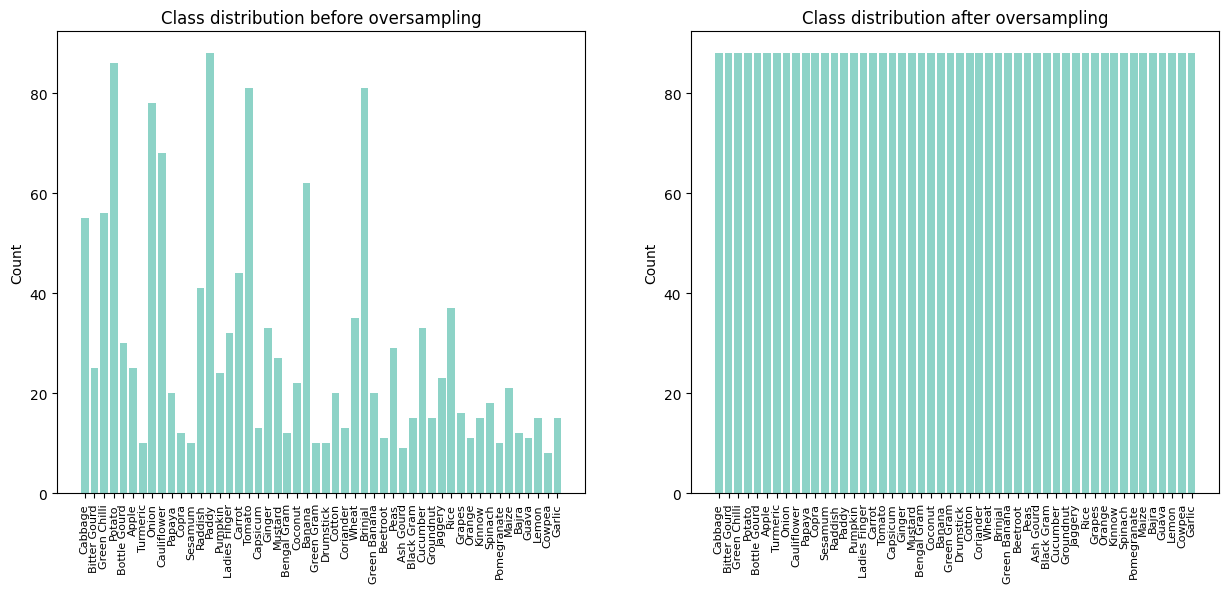

In [69]:
# count the class distribution before oversampling
before_oversampling = Counter(y_train)

# plot the distribution before and after oversampling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(before_oversampling.keys(), before_oversampling.values())
ax1.set_title("Class distribution before oversampling")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', labelrotation=90)

ax2.bar(Counter(y_train_SMOTE).keys(), Counter(y_train_SMOTE).values())
ax2.set_title("Class distribution after oversampling")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', labelrotation=90)

# adjust the font size of the tick labels on the x axis
ax1.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='x', labelsize=8)

plt.show()

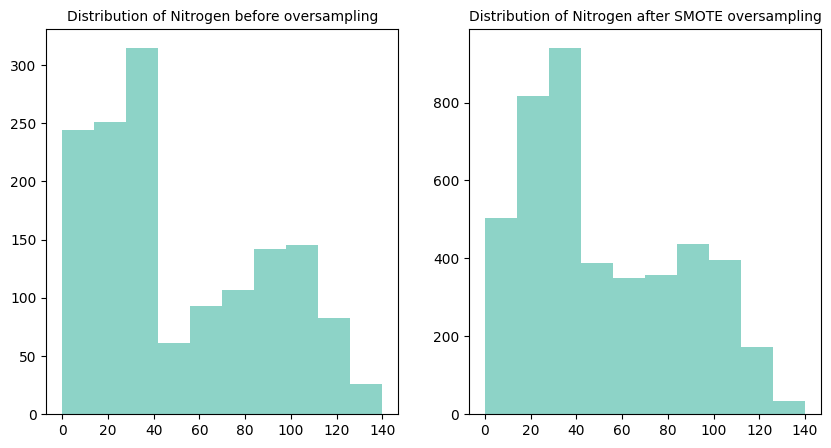

In [70]:
# plot histogram of the 'RAINFALL' column in the training set before and after oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train['N_SOIL'])
plt.title("Distribution of Nitrogen before oversampling", fontsize=10)

plt.subplot(1, 2, 2)
plt.hist(x_train_SMOTE['N_SOIL'])
plt.title("Distribution of Nitrogen after SMOTE oversampling", fontsize=10)
plt.show()


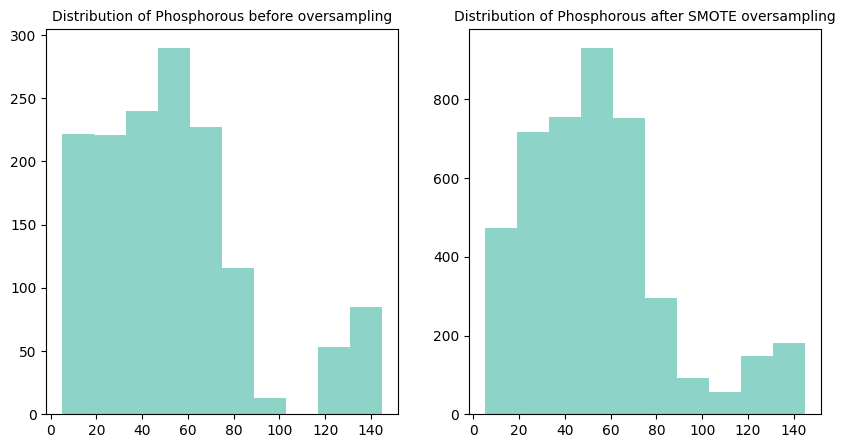

In [71]:
# plot histogram of the 'RAINFALL' column in the training set before and after oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train['P_SOIL'])
plt.title("Distribution of Phosphorous before oversampling", fontsize=10)

plt.subplot(1, 2, 2)
plt.hist(x_train_SMOTE['P_SOIL'])
plt.title("Distribution of Phosphorous after SMOTE oversampling", fontsize=10)
plt.show()

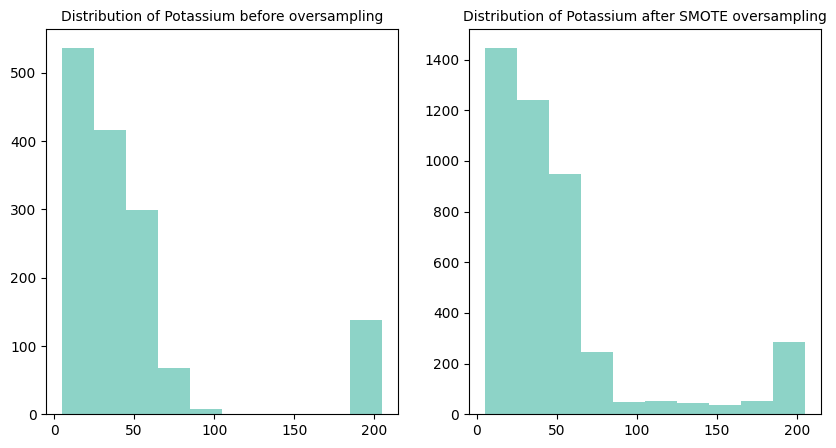

In [72]:
# plot histogram of the 'RAINFALL' column in the training set before and after oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train['K_SOIL'])
plt.title("Distribution of Potassium before oversampling", fontsize=10)

plt.subplot(1, 2, 2)
plt.hist(x_train_SMOTE['K_SOIL'])
plt.title("Distribution of Potassium after SMOTE oversampling", fontsize=10)
plt.show()

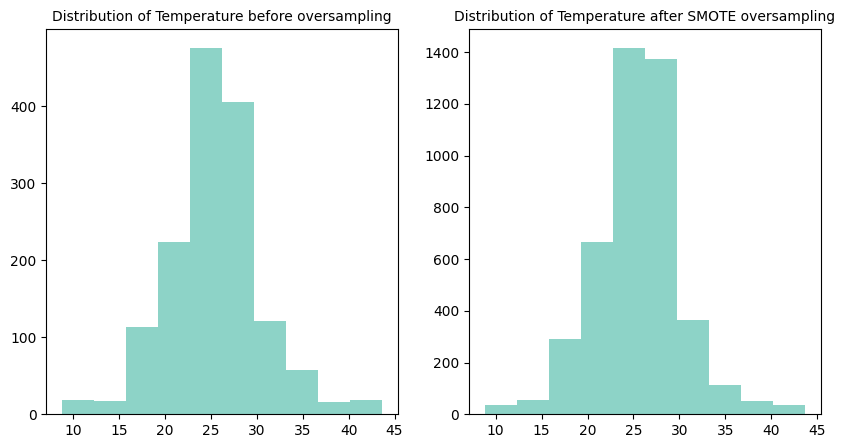

In [73]:
# plot histogram of the 'RAINFALL' column in the training set before and after oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train['TEMPERATURE'])
plt.title("Distribution of Temperature before oversampling", fontsize=10)

plt.subplot(1, 2, 2)
plt.hist(x_train_SMOTE['TEMPERATURE'])
plt.title("Distribution of Temperature after SMOTE oversampling", fontsize=10)
plt.show()

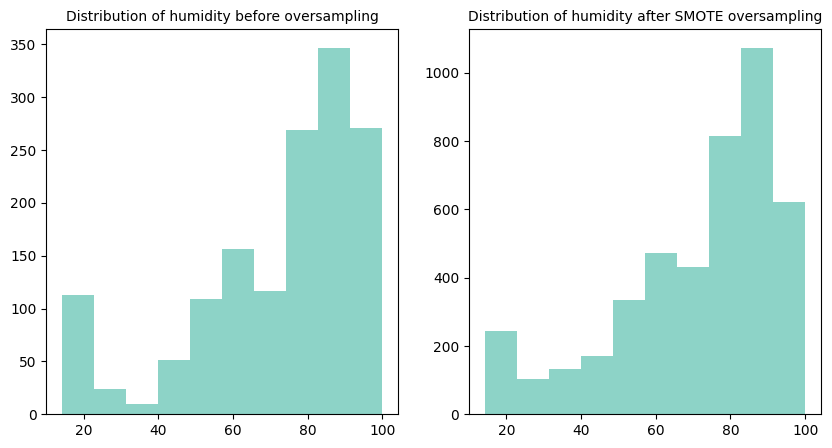

In [74]:
# plot histogram of the 'RAINFALL' column in the training set before and after oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train['HUMIDITY'])
plt.title("Distribution of humidity before oversampling", fontsize=10)

plt.subplot(1, 2, 2)
plt.hist(x_train_SMOTE['HUMIDITY'])
plt.title("Distribution of humidity after SMOTE oversampling", fontsize=10)
plt.show()

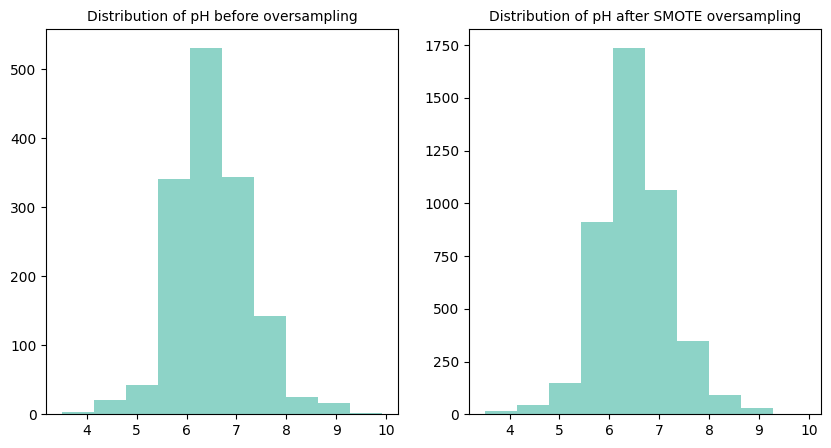

In [75]:
# plot histogram of the 'RAINFALL' column in the training set before and after oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train['ph'])
plt.title("Distribution of pH before oversampling", fontsize=10)

plt.subplot(1, 2, 2)
plt.hist(x_train_SMOTE['ph'])
plt.title("Distribution of pH after SMOTE oversampling", fontsize=10)
plt.show()

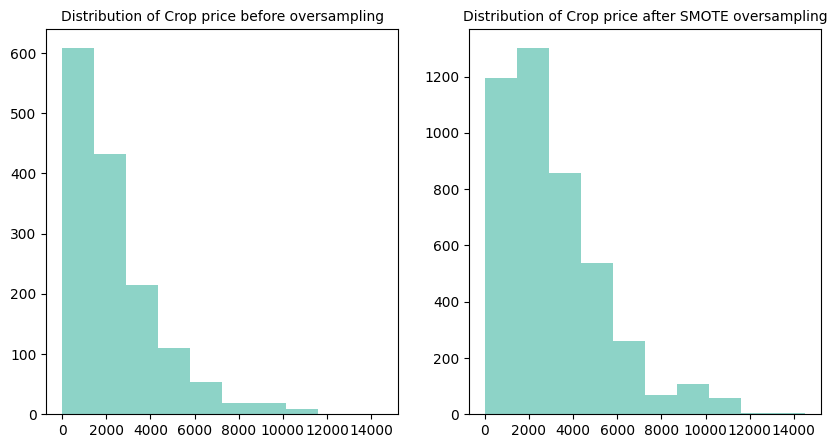

In [76]:
# plot histogram of the 'RAINFALL' column in the training set before and after oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train['CROP_PRICE'])
plt.title("Distribution of Crop price before oversampling", fontsize=10)

plt.subplot(1, 2, 2)
plt.hist(x_train_SMOTE['CROP_PRICE'])
plt.title("Distribution of Crop price after SMOTE oversampling", fontsize=10)
plt.show()

In [77]:
# save oversampled data to csv for further analysis
oversampled_data = pd.concat([x_train_SMOTE, y_train_SMOTE], axis=1)
oversampled_data.to_csv('oversampled_data.csv', index=False)

Modelling

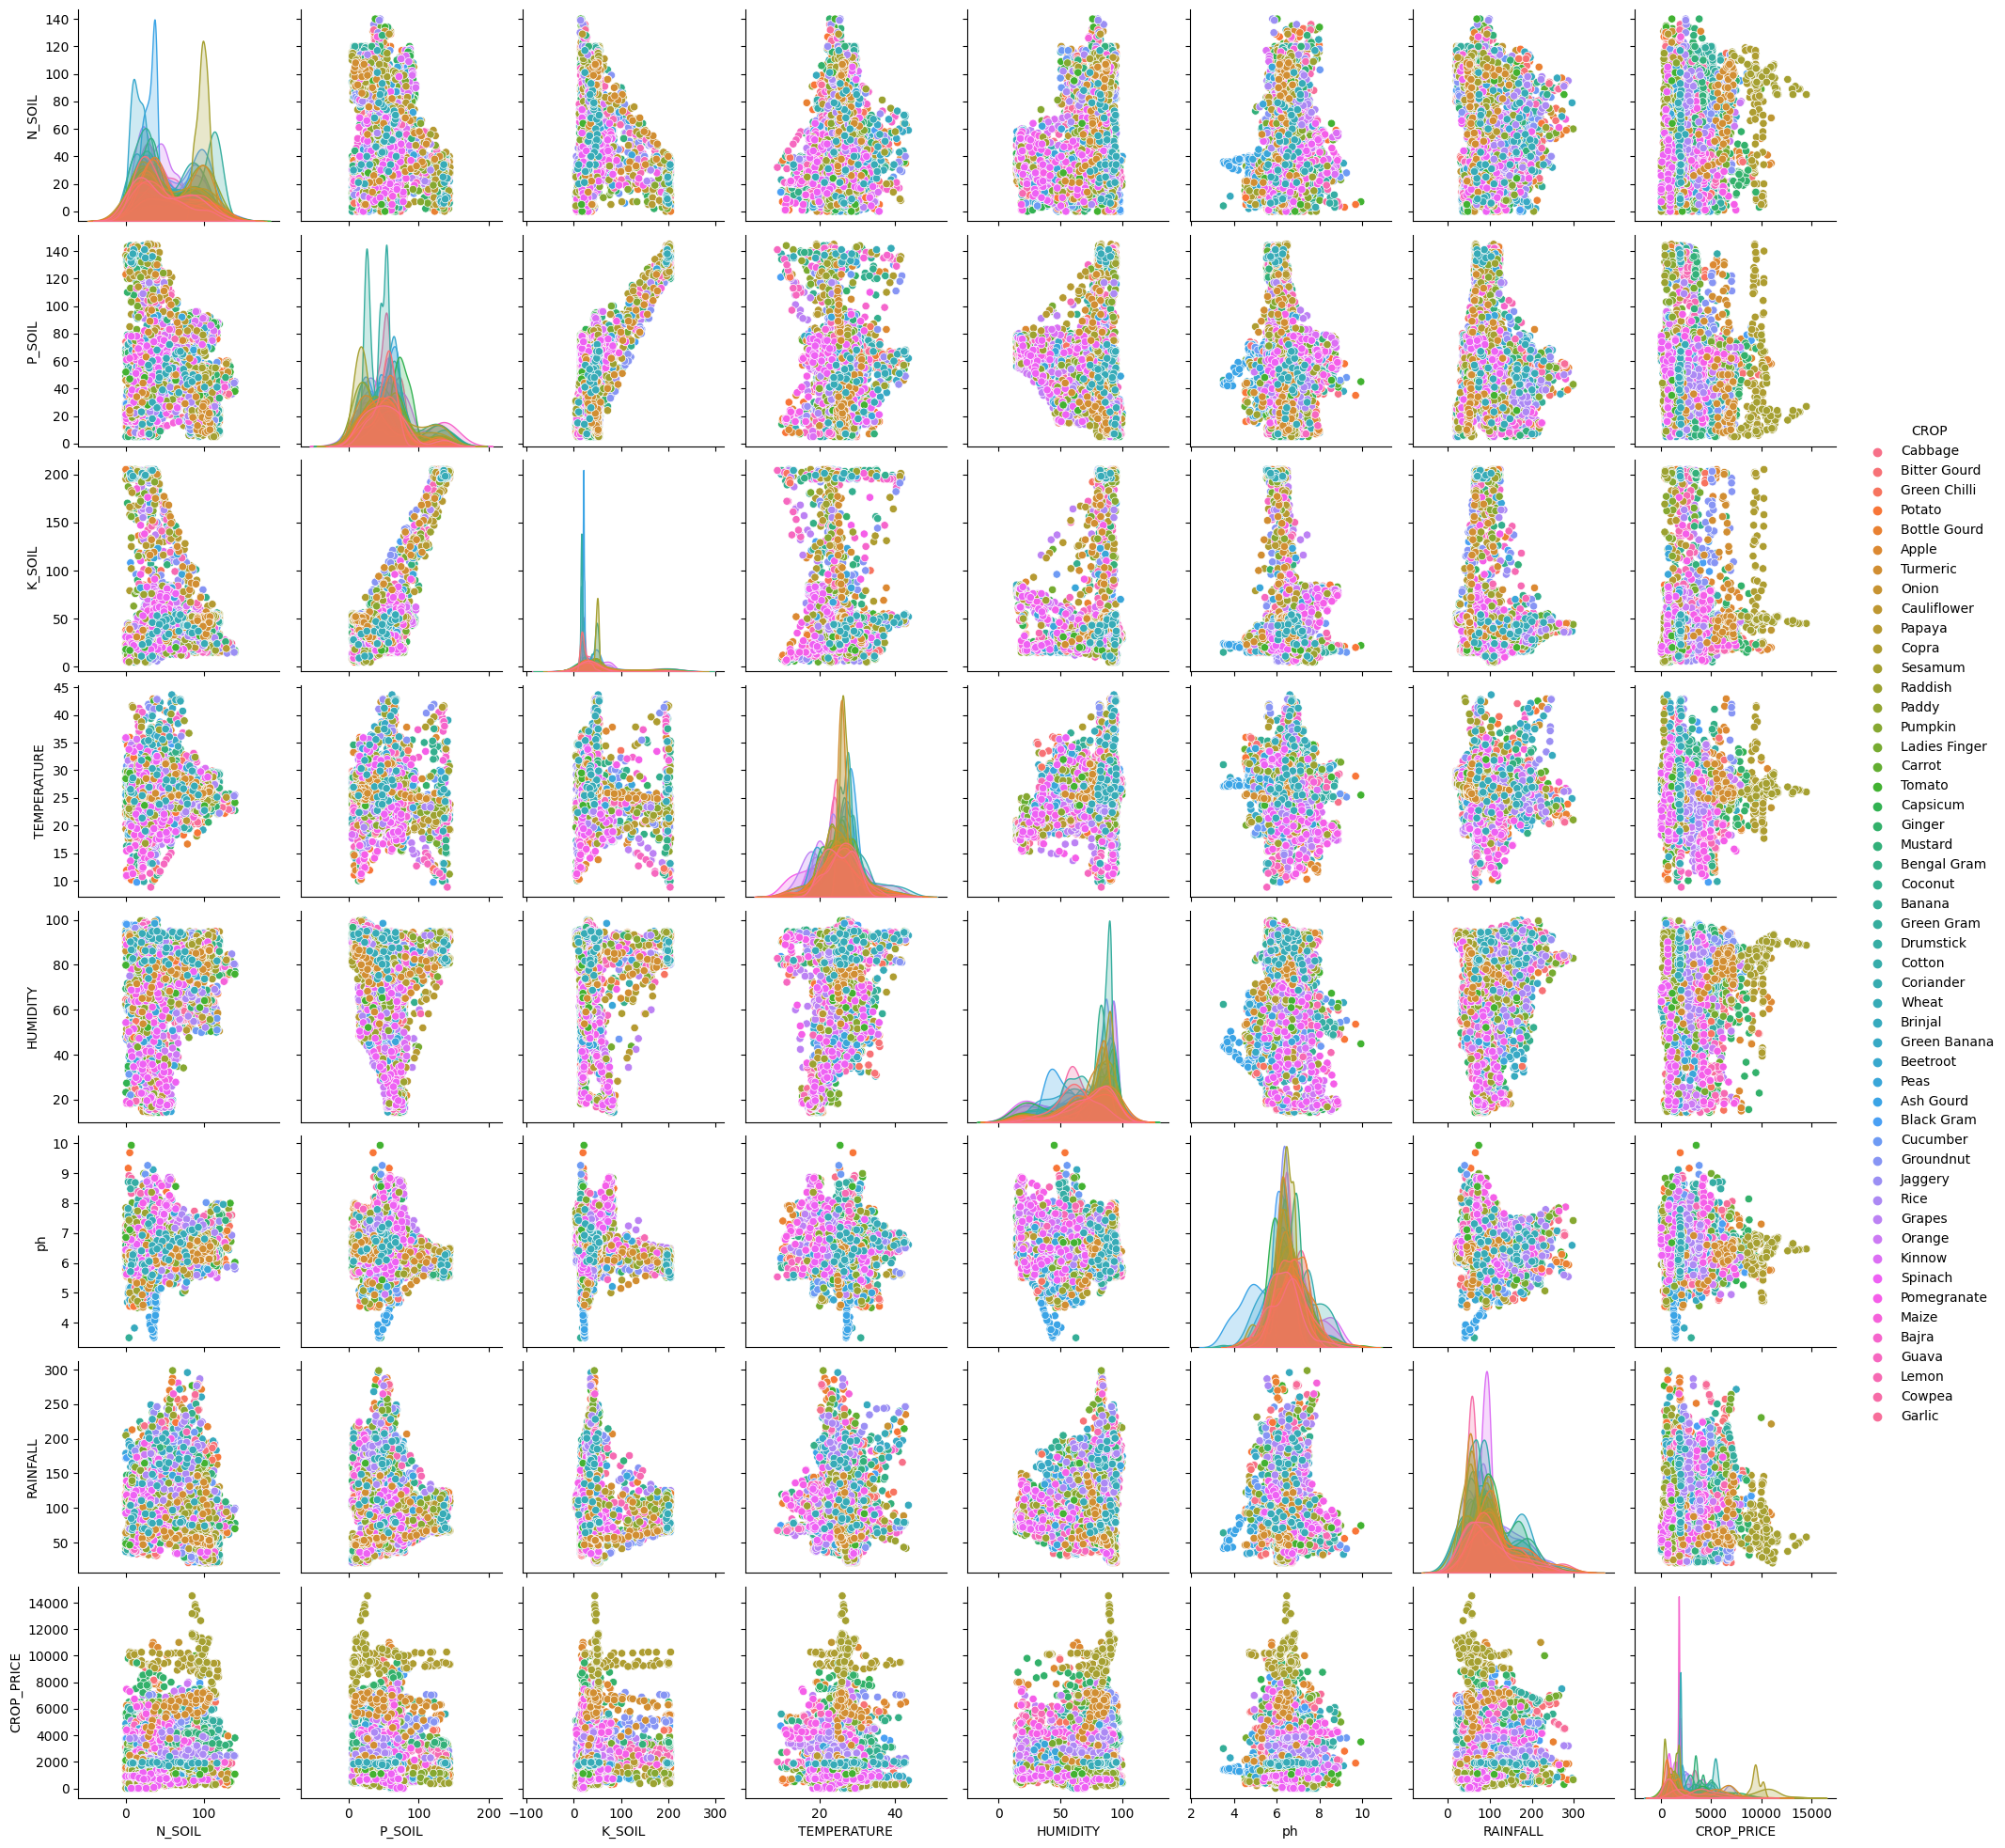

In [83]:
#Check which features should be dropped

#P and K strongly correltaed to each other, therefore not both will be used in ML
df=oversampled_data

sns.pairplot(df, hue ='CROP')
plt.show()

Random Forest and Naive Bayes

In [240]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#NB
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [241]:
#segragating data
#using backward feature selection method
X=x_train_SMOTE.drop(["TEMPERATURE","K_SOIL"],axis=1) #contains all features
Y=y_train_SMOTE #contains CROP

np.random.seed(1234)
#70/30 split
X_train_ML, X_test_ML, y_train_ML, y_test_ML = train_test_split(X,Y, test_size=0.3)

In [242]:
X

N_SOIL  P_SOIL   HUMIDITY        ph    RAINFALL  CROP_PRICE
0         36      58  59.318912  8.399136   36.926297        1600
1         36      57  57.142188  8.292876   57.028917        3400
2         81      56  72.605129  7.097586  174.787641        1200
3         31      13  95.487634  5.859719  205.546311         440
4         41      62  64.149285  7.358975   65.241944        1500
...      ...     ...        ...       ...         ...         ...
4395      21      14  93.959515  6.924103  135.005269        1969
4396      93      48  80.300440  7.191133  168.796505        1908
4397      43      48  91.832825  6.537407  163.381942        1779
4398      70      67  94.459407  6.683328   79.007586        1950
4399      40      26  95.017222  6.464711  131.792924        1957

[4400 rows x 6 columns]

In [243]:
#RF model fitting
rf = RandomForestClassifier()
rf.fit(X_train_ML, y_train_ML)

#NB model fitting
nb = GaussianNB()
nb.fit(X_train_ML, y_train_ML)

GaussianNB()

In [244]:
#Predict
y_pred_rf=rf.predict(X_test_ML)
y_pred_nb=nb.predict(X_test_ML)

In [245]:
#accuracy
accuracyRF = accuracy_score(y_test_ML, y_pred_rf)
accuracyNB = accuracy_score(y_test_ML, y_pred_nb)
print("RF Accuracy:", accuracyRF)
print("NB Accuracy:", accuracyNB)

RF Accuracy: 0.6590909090909091
NB Accuracy: 0.296969696969697


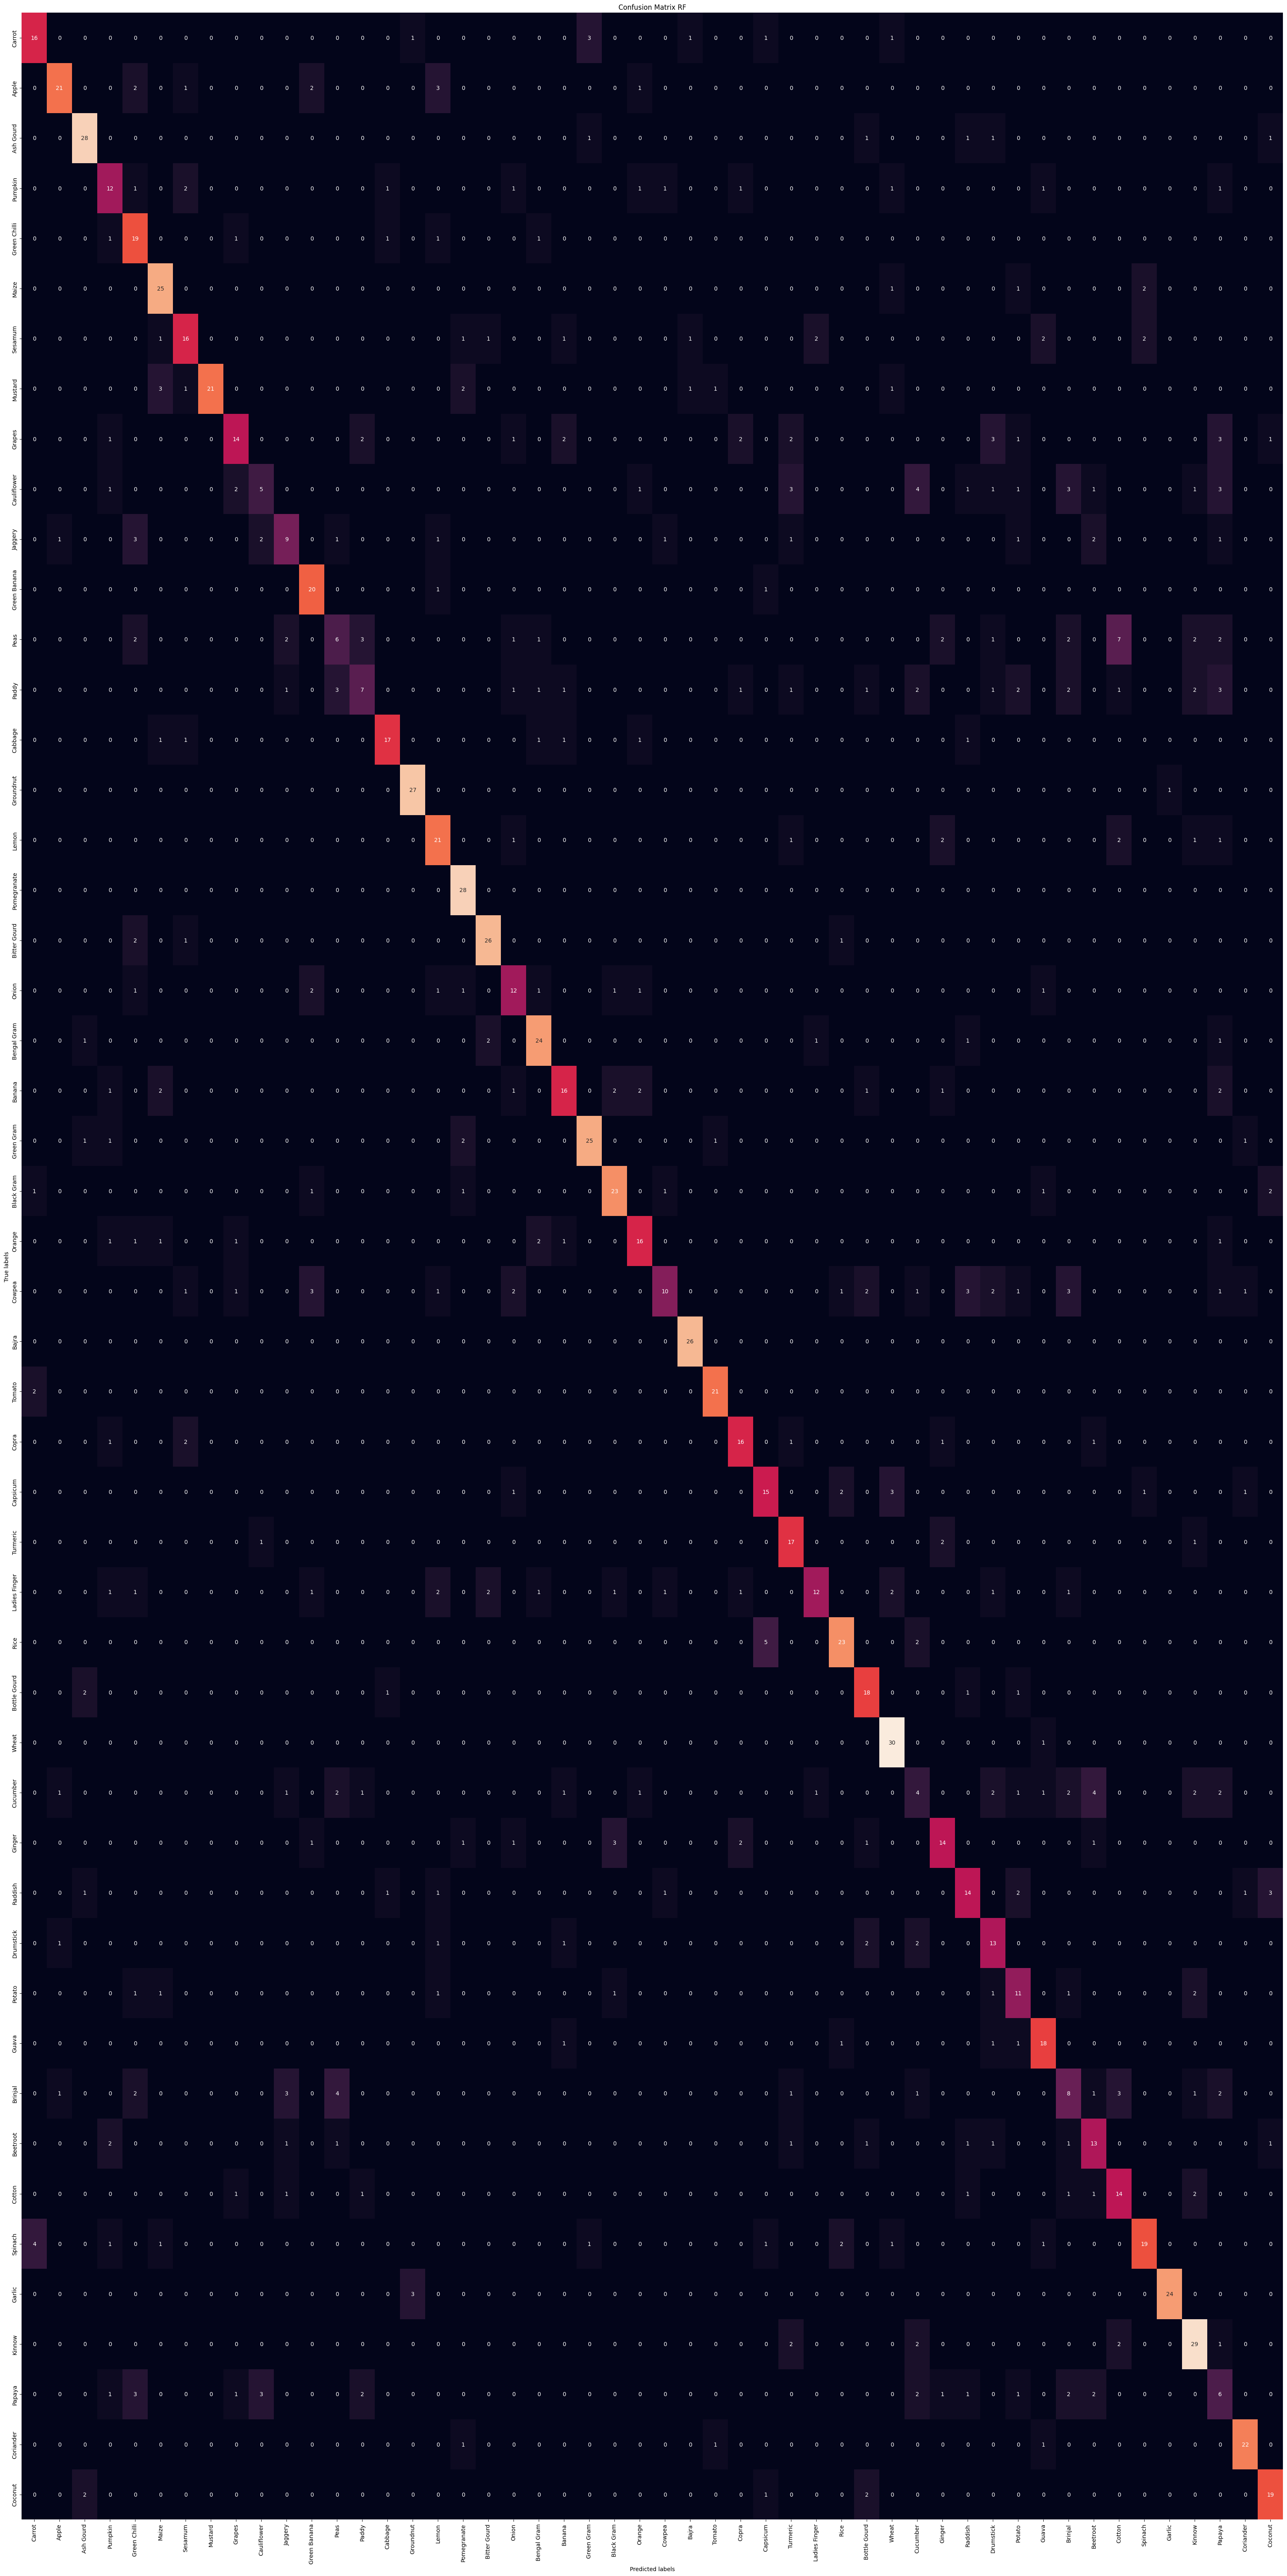

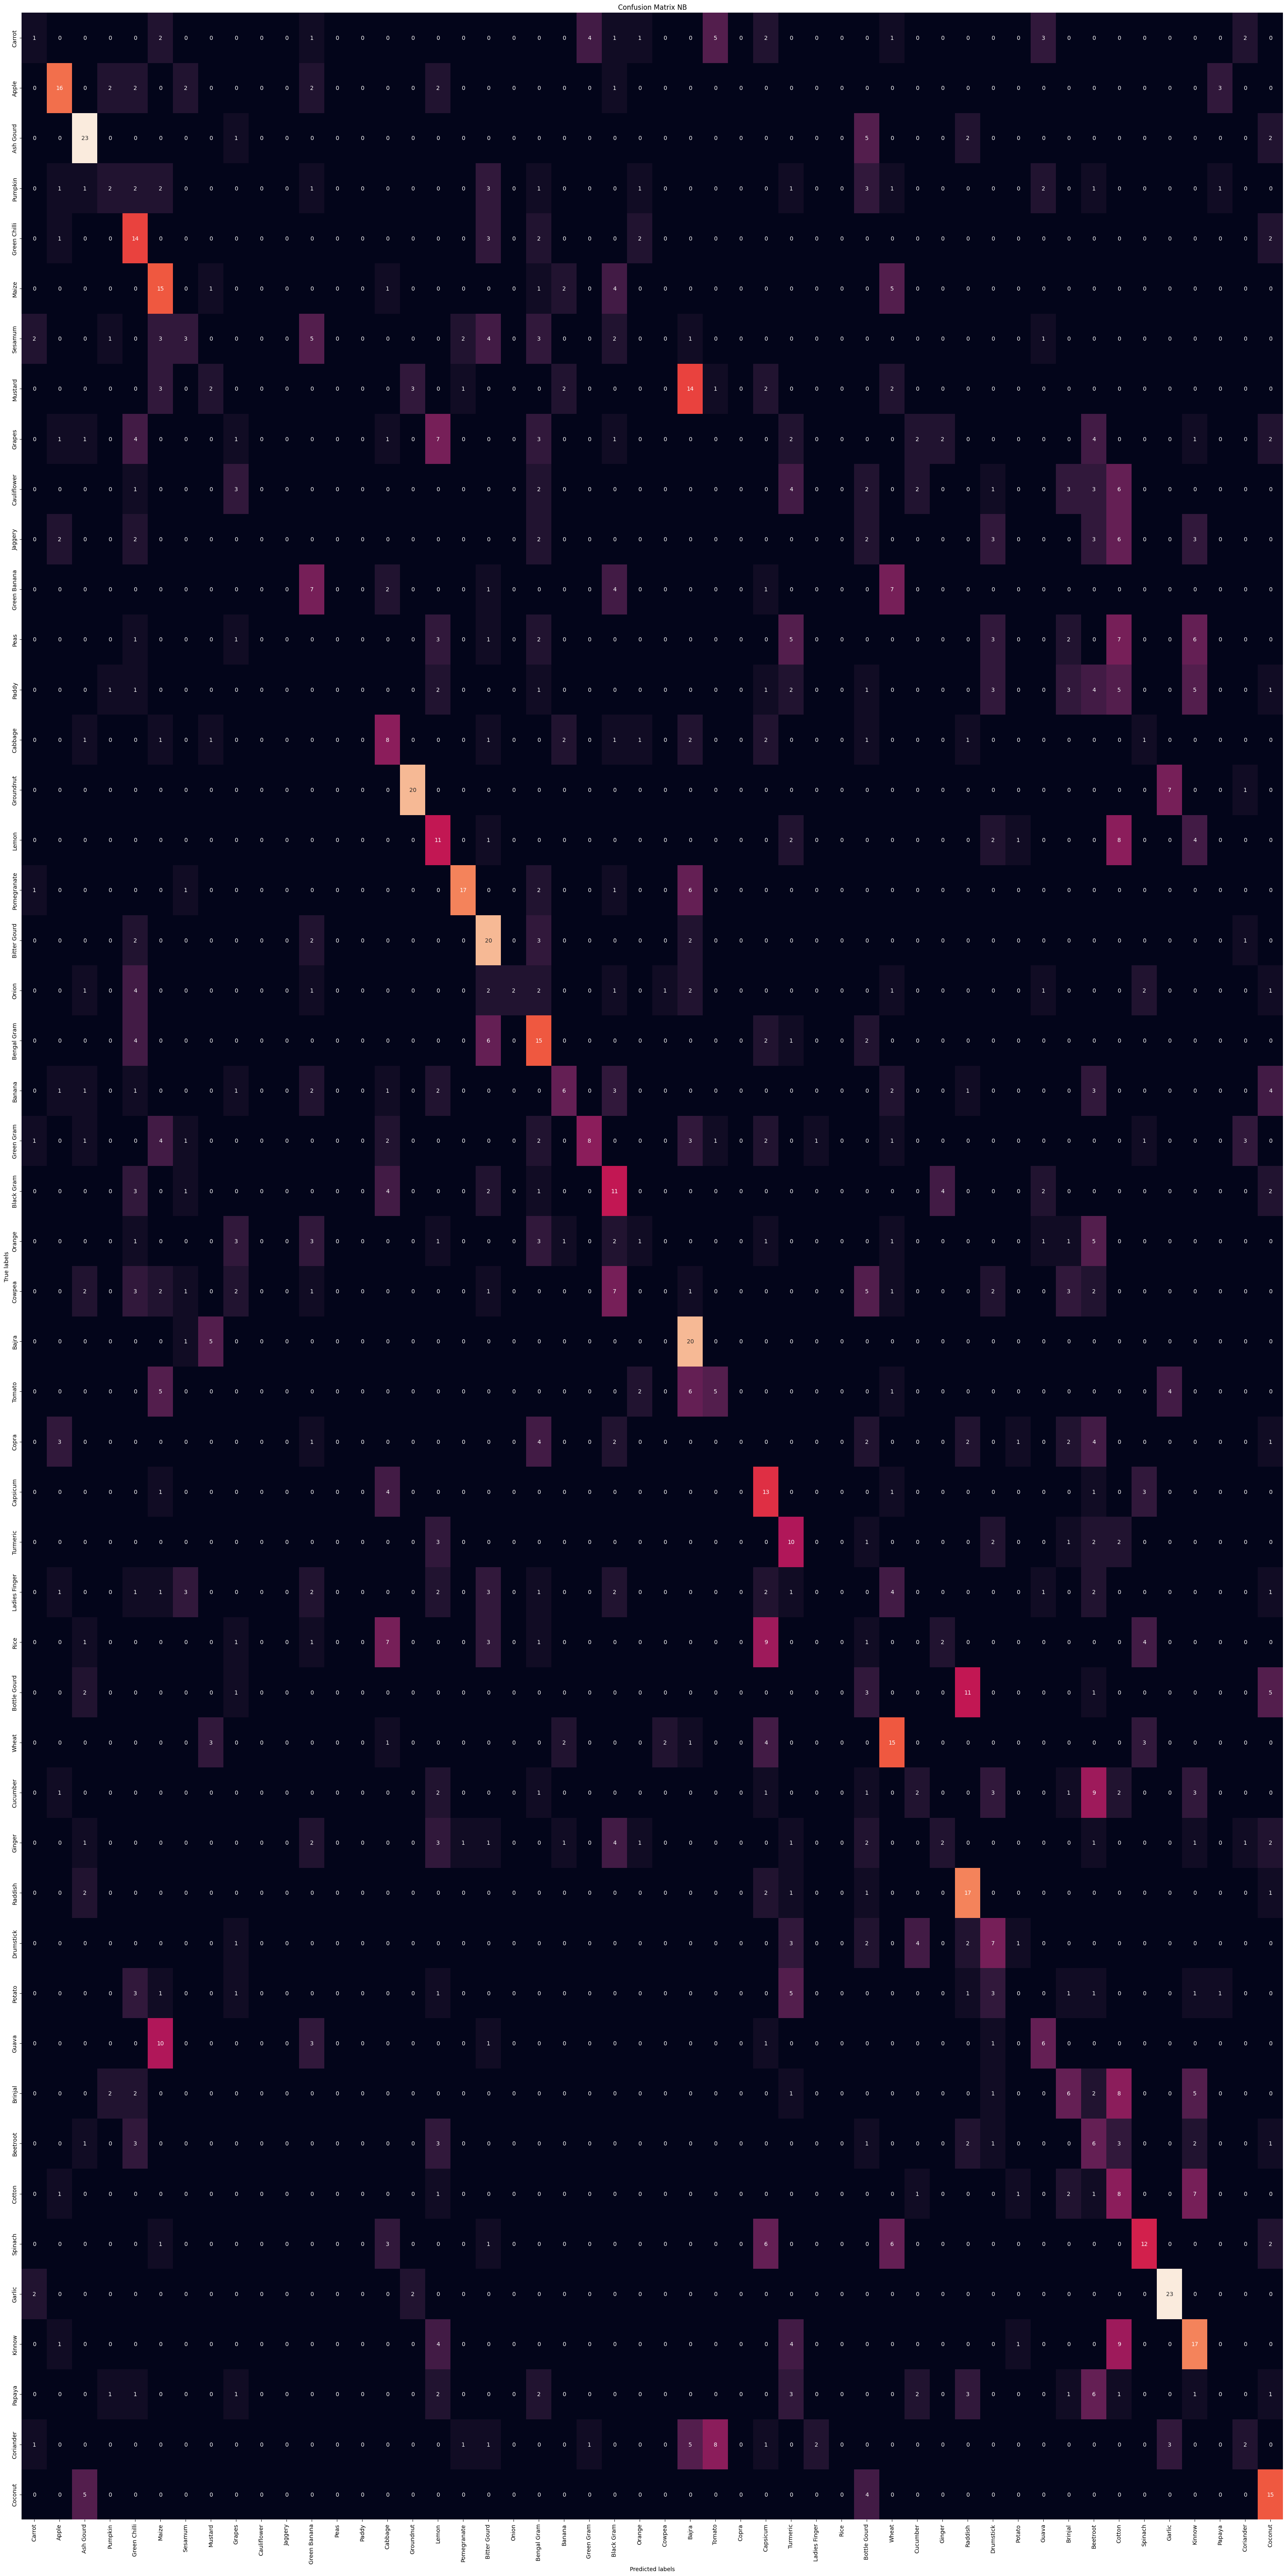

In [239]:
#confusion matrix
cm_RF = confusion_matrix(y_test_ML,y_pred_rf)
cm_NB = confusion_matrix(y_test_ML,y_pred_nb)

plt.figure(figsize=(40,80))
ax= plt.subplot()

sns.heatmap(cm_RF, annot=True, fmt='g',ax=ax,cbar=False);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
labels=pd.Series(y_test_ML.unique())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix RF')
ax.xaxis.set_ticklabels(labels,rotation=90)
ax.yaxis.set_ticklabels(labels)
plt.show()


plt.figure(figsize=(40,80))
ax= plt.subplot()

sns.heatmap(cm_NB, annot=True, fmt='g',ax=ax,cbar=False);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
labels=pd.Series(y_test_ML.unique())
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix NB')
ax.xaxis.set_ticklabels(labels,rotation=90)
ax.yaxis.set_ticklabels(labels)
plt.show()